<b><font color="SteelBlue" size="+3">Segmentez des clients d'un site e-commerce</font></b>

# Introduction

## Contexte

Dans un environnement e-commerce compétitif, Olist, une entreprise brésilienne novatrice, initie un projet ambitieux pour améliorer son interaction avec sa clientèle. Cette initiative découle d'une volonté forte de mieux comprendre les comportements d'achat et les préférences des clients à travers une segmentation détaillée. L'entreprise s'engage dans cette voie en mettant en place une équipe Data dédiée, marquant ainsi son entrée dans le domaine de la Data Science. L'objectif est d'exploiter un ensemble de données accumulées depuis janvier 2017, incluant l'historique des commandes, les retours de satisfaction, et plus encore, pour fournir aux équipes d'e-commerce des outils précis pour cibler leurs campagnes marketing.

## Objectifs

Le projet se concentre sur l'analyse approfondie des données disponibles pour révéler les divers profils de clients qui composent la base d'utilisateurs d'Olist. À travers des méthodes d'analyse non supervisées, l'objectif est de regrouper les clients en segments homogènes, fournissant ainsi un cadre clair pour la personnalisation des stratégies de communication. Cette segmentation vise à être dynamique, capable d'évoluer au fil du temps pour s'adapter aux changements dans les comportements d'achat et les préférences des clients. Par conséquent, une composante essentielle du projet est la mise en place d'une stratégie de maintenance prédictive, avec une recommandation sur la fréquence à laquelle la segmentation devrait être révisée pour maintenir sa pertinence et soutenir un avantage concurrentiel durable pour Olist.

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Brazil_Regions.png',
 'carte-bresil.jpg',
 'Carte_bresil.png',
 'data',
 'Deveau_Estelle_1_script_032024.sql',
 'Deveau_Estelle_2_notebook_exploration_032024.ipynb',
 'Deveau_Estelle_3_notebook_essais_032024.ipynb',
 'Deveau_Estelle_4_notebook_simulation_032024.ipynb',
 'svg']

In [3]:
os.listdir("data/sources/")

['Customer.csv',
 'CustomerCategoryCounts.csv',
 'CustomerPaymentPreferences.csv',
 'periodes',
 'Script-avec-periode.sql',
 'Script_projet.sql',
 'svg_scripts']

In [4]:
path     = "./data/sources/"
filename1 = "Customer.csv"
filename2 = "CustomerPaymentPreferences.csv"
filename3 = "CustomerCategoryCounts.csv"

In [5]:
df_customer = pd.read_csv(path + filename1)
df_payment = pd.read_csv(path + filename2)
df_category = pd.read_csv(path + filename3)

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Quick tour

## Custumer

In [7]:
df_customer.head()

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco             SP   
2  0000f46a3911fa3c0805444483337064      sao jose             SC   
3  0000f6ccb0745a6a4b88665a16c9f078         belem             PA   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba             SP   

   geolocation_lat  geolocation_lng       FirstOrderDate        LastOrderDate  \
0       -23.340235       -46.830140  2018-05-10 10:56:27  2018-05-10 10:56:27   
1       -23.559115       -46.787626  2018-05-07 11:11:27  2018-05-07 11:11:27   
2       -27.542880       -48.633426  2017-03-10 21:05:03  2017-03-10 21:05:03   
3        -1.312214       -48.483159  2017-10-12 20:29:41  2017-10-12 20:29:41   
4       -23.505548       -47.469705  2017-11-14 19:45:42  2017-11-14 19:45:42   

   TotalOrders  TotalSpent  TotalFreight  AvgItems  nb_item  \
0            1      129.90         12.00       1.0        1   
1            1       18.90          8.29       1.0        1   
2            1       69.00         17.22       1.0        1   
3            1       25.99         17.63       1.0        1   
4            1      180.00         16.89       1.0        1   

   ActualDeliveryTime  EstimatedActualDifference  AverageReviewScore  \
0            6.411227                   4.132905                 5.0   
1            3.285590                   4.248125                 4.0   
2           25.731759                   1.389734                 3.0   
3           20.037083                  11.108970                 4.0   
4           13.141134                   7.035463                 5.0   

   NumberOfReviews  NumberOfCommentTitles  NumberOfComments  \
0              1.0                    1.0               1.0   
1              1.0                    0.0               0.0   
2              1.0                    0.0               0.0   
3              1.0                    0.0               1.0   
4              1.0                    0.0               0.0   

   DifferentCategories  AvgWeight  AvgVolume  
0                    1     1500.0     7616.0  
1                    1      375.0     5148.0  
2                    1     1500.0    43750.0  
3                    1      150.0     1045.0  
4                    1     6050.0      528.0

In [8]:
df_customer.shape

(93356, 21)

In [9]:
df_customer.dtypes.value_counts()

float64    13
object      5
int64       3
Name: count, dtype: int64

In [10]:
df_customer.describe()

geolocation_lat  geolocation_lng   TotalOrders    TotalSpent  \
count     93101.000000     93101.000000  93356.000000  93356.000000   
mean        -21.190294       -46.185685      1.035263    141.796698   
std           5.613621         4.057250      0.215064    216.288630   
min         -33.689948       -72.668881      1.000000      0.850000   
25%         -23.589822       -48.124775      1.000000     47.795000   
50%         -22.924015       -46.632425      1.000000     89.800000   
75%         -20.129695       -43.622642      1.000000    154.900000   
max          42.184003        -8.723762     16.000000  13440.000000   

       TotalFreight      AvgItems       nb_item  ActualDeliveryTime  \
count  93356.000000  93356.000000  93356.000000        93356.000000   
mean      23.575889      1.139544      1.180385           12.567974   
std       22.810315      0.527087      0.620869            9.546557   
min        0.000000      1.000000      1.000000            0.533414   
25%       14.080000      1.000000      1.000000            6.788322   
50%       17.600000      1.000000      1.000000           10.234311   
75%       25.560000      1.000000      1.000000           15.718643   
max     1794.960000     21.000000     24.000000          209.628611   

       EstimatedActualDifference  AverageReviewScore  NumberOfReviews  \
count               93356.000000        92753.000000     92753.000000   
mean                   11.151587            4.152601         1.040797   
std                    10.142746            1.280353         0.256148   
min                  -188.975081            1.000000         1.000000   
25%                     6.392506            4.000000         1.000000   
50%                    11.748356            5.000000         1.000000   
75%                    16.227451            5.000000         1.000000   
max                   146.016123            5.000000        16.000000   

       NumberOfCommentTitles  NumberOfComments  DifferentCategories  \
count           92753.000000      92753.000000         93356.000000   
mean                0.121107          0.422682             1.011783   
std                 0.333120          0.524229             0.205829   
min                 0.000000          0.000000             0.000000   
25%                 0.000000          0.000000             1.000000   
50%                 0.000000          0.000000             1.000000   
75%                 0.000000          1.000000             1.000000   
max                 4.000000          7.000000             5.000000   

           AvgWeight     AvgVolume  
count   93343.000000  9.334300e+04  
mean     2388.522322  1.733288e+04  
std      4750.617441  3.002445e+04  
min         0.000000  1.680000e+02  
25%       300.000000  2.992000e+03  
50%       750.000000  7.406000e+03  
75%      2100.000000  1.987200e+04  
max    184400.000000  1.476000e+06

In [11]:
df_customer.nunique()

customer_unique_id           93356
customer_city                 4085
customer_state                  27
geolocation_lat              14730
geolocation_lng              14730
FirstOrderDate               93115
LastOrderDate                93112
TotalOrders                      9
TotalSpent                    8276
TotalFreight                  8088
AvgItems                        39
nb_item                         19
ActualDeliveryTime           91777
EstimatedActualDifference    89287
AverageReviewScore              32
NumberOfReviews                  9
NumberOfCommentTitles            5
NumberOfComments                 8
DifferentCategories              6
AvgWeight                     3360
AvgVolume                     7723
dtype: int64

In [12]:
# Valeurs manquantes
missing_values_count = df_customer.isnull().sum()
total_cells = np.product(df_customer.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.15 %


In [13]:
percent_missing_values =  round((missing_values_count / len(df_customer)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
customer_unique_id                                    0   
customer_city                                         0   
customer_state                                        0   
geolocation_lat                                     255   
geolocation_lng                                     255   
FirstOrderDate                                        0   
LastOrderDate                                         0   
TotalOrders                                           0   
TotalSpent                                            0   
TotalFreight                                          0   
AvgItems                                              0   
nb_item                                               0   
ActualDeliveryTime                                    0   
EstimatedActualDifference                             0   
AverageReviewScore                                  603   
NumberOfReviews                                     603   
NumberOfCommentTitles                               603   
NumberOfComments                                    603   
DifferentCategories                                   0   
AvgWeight                                            13   
AvgVolume                                            13   

                           Pourcentage de valeurs manquantes  
customer_unique_id                                      0.00  
customer_city                                           0.00  
customer_state                                          0.00  
geolocation_lat                                         0.27  
geolocation_lng                                         0.27  
FirstOrderDate                                          0.00  
LastOrderDate                                           0.00  
TotalOrders                                             0.00  
TotalSpent                                              0.00  
TotalFreight                                            0.00  
AvgItems                                                0.00  
nb_item                                                 0.00  
ActualDeliveryTime                                      0.00  
EstimatedActualDifference                               0.00  
AverageReviewScore                                      0.65  
NumberOfReviews                                         0.65  
NumberOfCommentTitles                                   0.65  
NumberOfComments                                        0.65  
DifferentCategories                                     0.00  
AvgWeight                                               0.01  
AvgVolume                                               0.01

<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

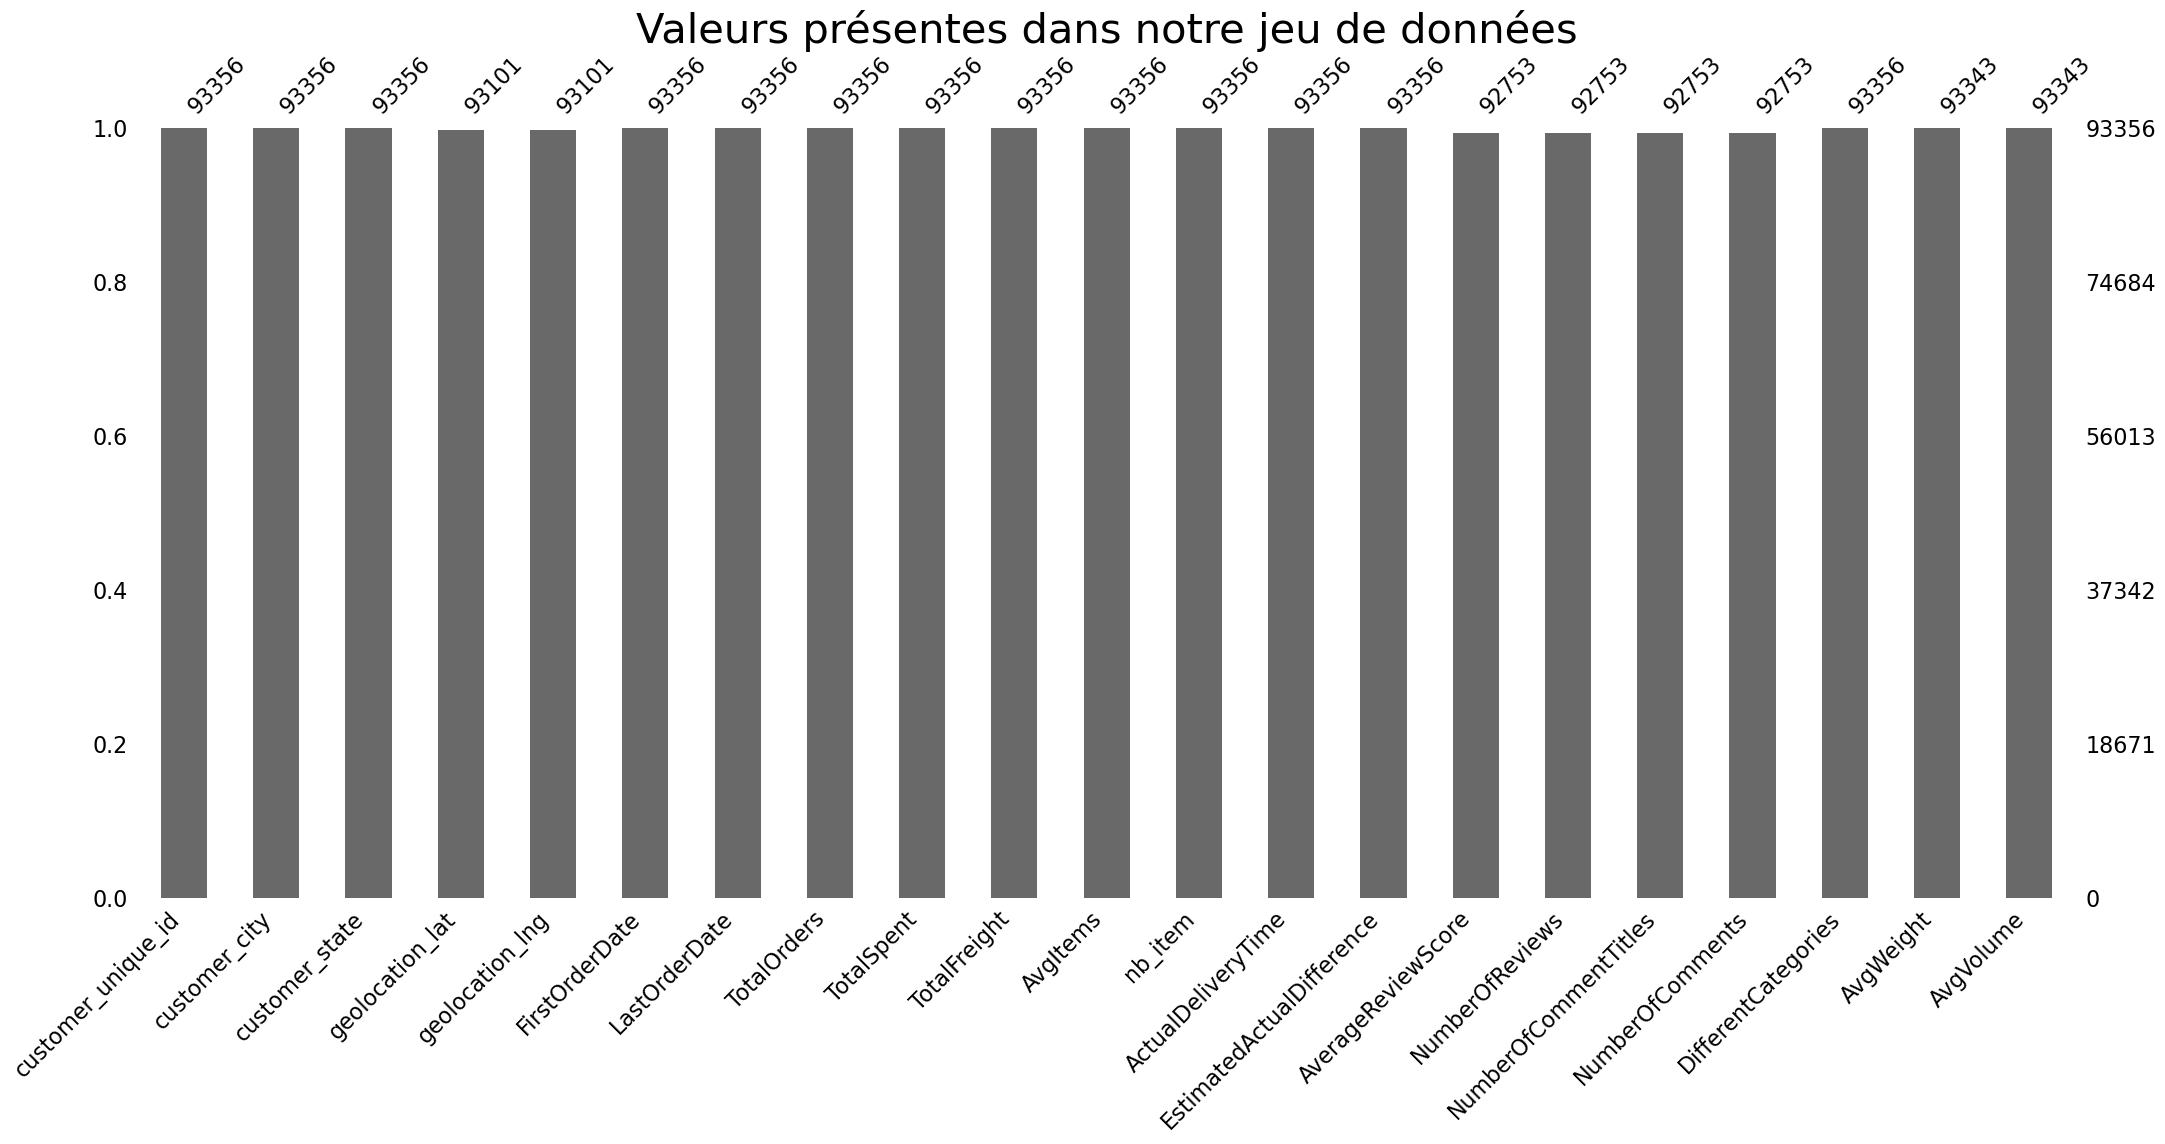

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_customer)

<Axes: >

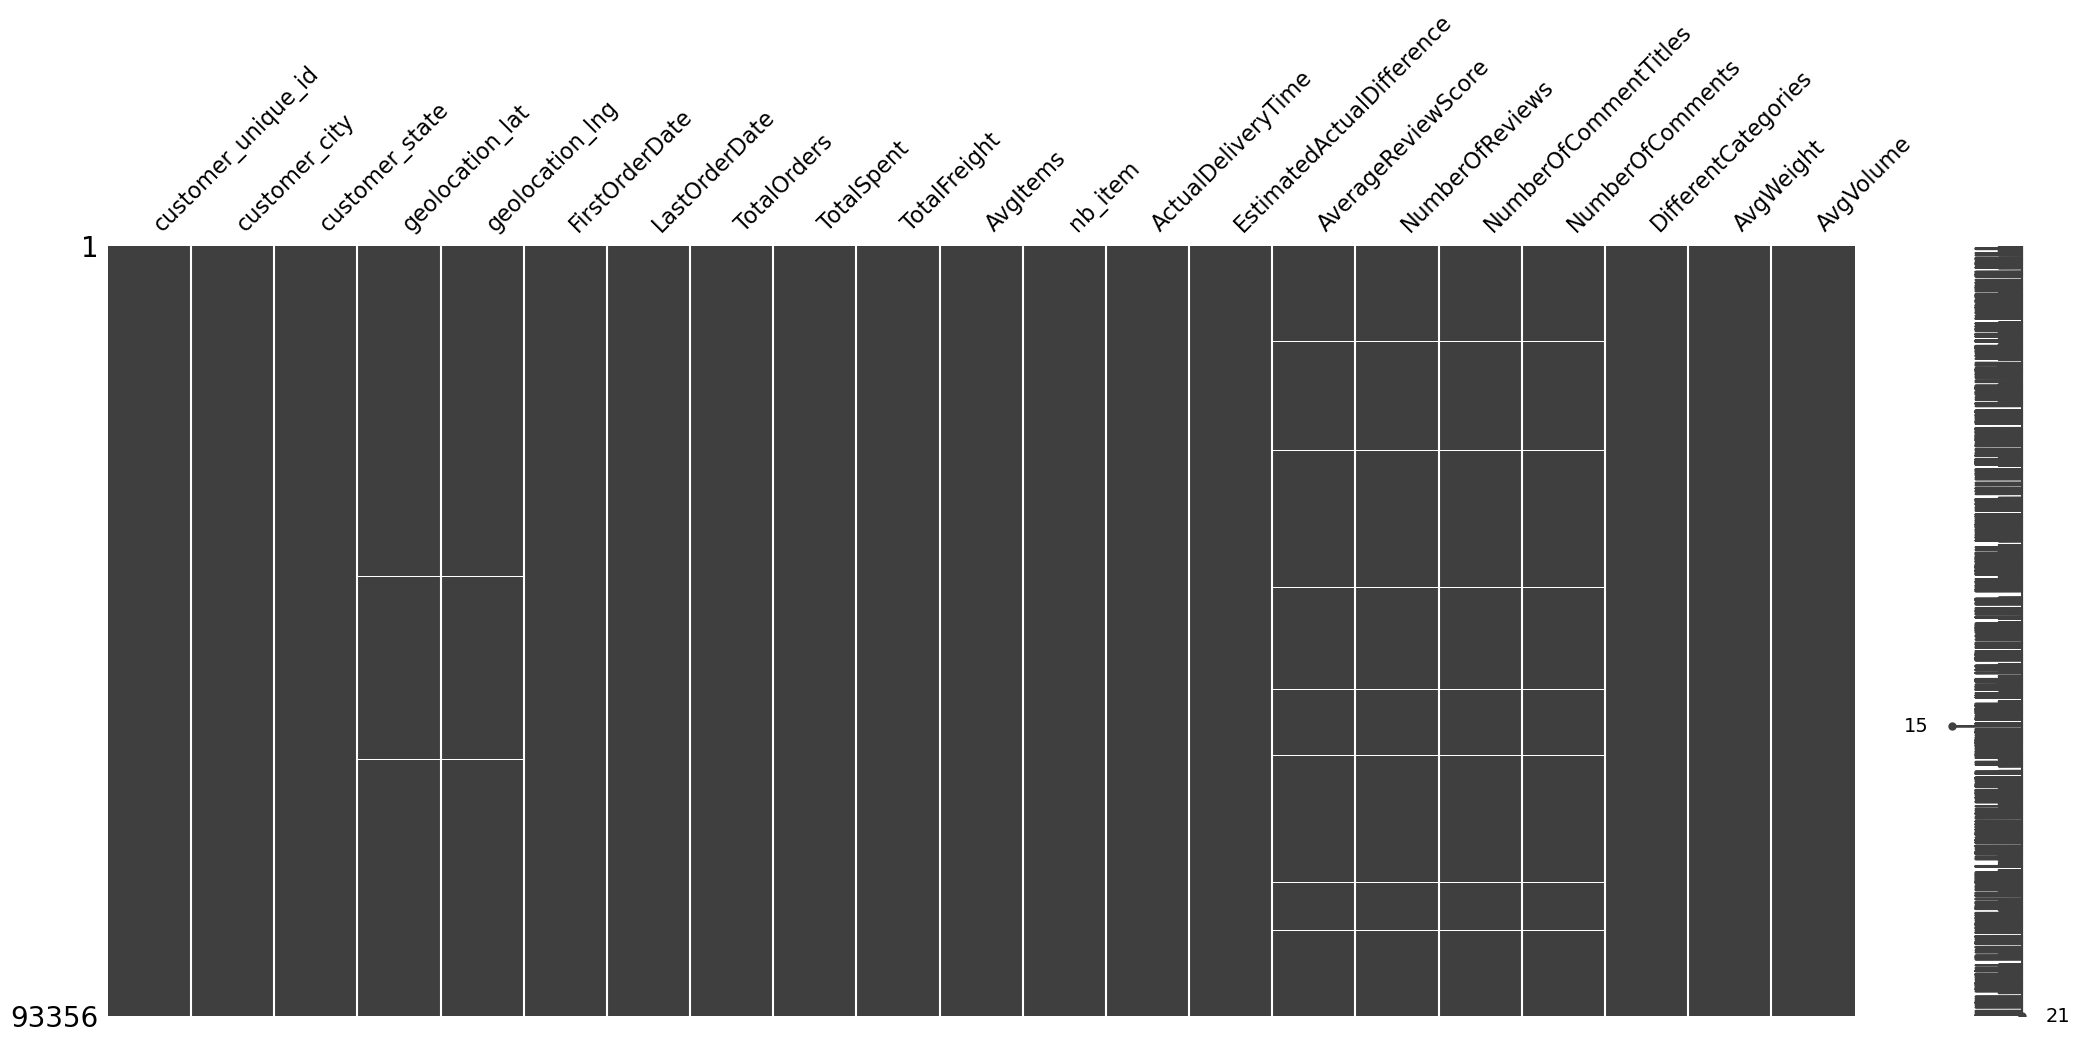

In [15]:
msno.matrix(df_customer)

## CustumerPaymentPreferences

In [16]:
df_payment.head()

customer_unique_id payment_type  PaymentCount  \
0  0000366f3b9a7992bf8c76cfdf3221e2  credit_card             1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  credit_card             1   
2  0000f46a3911fa3c0805444483337064  credit_card             1   
3  0000f6ccb0745a6a4b88665a16c9f078  credit_card             1   
4  0004aac84e0df4da2b147fca70cf8255  credit_card             1   

   TotalInstallments  TotalPaymentValue  
0                  8             141.90  
1                  1              27.19  
2                  8              86.22  
3                  4              43.62  
4                  6             196.89

In [17]:
df_payment.shape

(98657, 5)

In [18]:
df_payment.dtypes.value_counts()

object     2
int64      2
float64    1
Name: count, dtype: int64

In [19]:
df_payment.describe()

PaymentCount  TotalInstallments  TotalPaymentValue
count  98657.000000       98657.000000       98657.000000
mean       1.052992           3.004571         162.267415
std        0.398400           2.944365         227.502178
min        1.000000           0.000000           0.000000
25%        1.000000           1.000000          60.470000
50%        1.000000           2.000000         105.010000
75%        1.000000           4.000000         178.820000
max       33.000000          64.000000       13664.080000

In [20]:
df_payment.nunique()

customer_unique_id    96094
payment_type              5
PaymentCount             21
TotalInstallments        41
TotalPaymentValue     29186
dtype: int64

In [21]:
# Valeurs manquantes
missing_values_count = df_payment.isnull().sum()
total_cells = np.product(df_payment.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [22]:
percent_missing_values =  round((missing_values_count / len(df_payment)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
customer_unique_id                             0   
payment_type                                   0   
PaymentCount                                   0   
TotalInstallments                              0   
TotalPaymentValue                              0   

                    Pourcentage de valeurs manquantes  
customer_unique_id                                0.0  
payment_type                                      0.0  
PaymentCount                                      0.0  
TotalInstallments                                 0.0  
TotalPaymentValue                                 0.0

## CustumerCategoryCounts

In [23]:
df_category.head()

customer_unique_id product_category_name_english  \
0  0000366f3b9a7992bf8c76cfdf3221e2                bed_bath_table   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 health_beauty   
2  0000f46a3911fa3c0805444483337064                    stationery   
3  0000f6ccb0745a6a4b88665a16c9f078                     telephony   
4  0004aac84e0df4da2b147fca70cf8255                     telephony   

   CategoryCount  TotalSpentPerCategory  
0              1                 129.90  
1              1                  18.90  
2              1                  69.00  
3              1                  25.99  
4              1                 180.00

In [24]:
df_category.shape

(97909, 4)

In [25]:
df_category.dtypes.value_counts()

object     2
int64      1
float64    1
Name: count, dtype: int64

In [26]:
df_category.describe()

CategoryCount  TotalSpentPerCategory
count   97909.000000           97909.000000
mean        1.150487             138.798640
std         0.568281             213.996102
min         1.000000               0.850000
25%         1.000000              45.900000
50%         1.000000              87.000000
75%         1.000000             149.990000
max        24.000000           13440.000000

In [27]:
df_category.nunique()

customer_unique_id               95414
product_category_name_english       72
CategoryCount                       19
TotalSpentPerCategory             7698
dtype: int64

In [28]:
# Valeurs manquantes
missing_values_count = df_category.isnull().sum()
total_cells = np.product(df_category.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [29]:
percent_missing_values =  round((missing_values_count / len(df_category)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
customer_unique_id                                        0   
product_category_name_english                             0   
CategoryCount                                             0   
TotalSpentPerCategory                                     0   

                               Pourcentage de valeurs manquantes  
customer_unique_id                                           0.0  
product_category_name_english                                0.0  
CategoryCount                                                0.0  
TotalSpentPerCategory                                        0.0

## Liens

Les 3 dataframes contiennent le customer_unique_id ce qui va nous permettre de merger ces données.

# Merge des données

La stratégie va être d'apporter plus de features au df_custumer grace aux informations contenues dans les deux autres dataframe.<br> 
Nous allons ajouter pour chaque client : <br>
- le moyen de paiement "préféré", à savoir celui avec lequel ils ont le plus payé
- le taux de paimement en voucher 
- le nombre de catégories différentes achetées
- la catégorie "préférée", à savoir celle dans laquelle ils ont le plus dépensé

## Merge Paiement

In [30]:
print("Valeurs uniques pour payment_type dans df_payment:", df_payment['payment_type'].unique())

Valeurs uniques pour payment_type dans df_payment: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [31]:
# Calculer la somme totale des paiements pour chaque client
total_payment_by_customer = df_payment.groupby('customer_unique_id')['TotalPaymentValue'].sum()

# Calculer la somme totale des échéances de paiement pour chaque client
total_installments_by_customer = df_payment.groupby('customer_unique_id')['TotalInstallments'].sum()

# Créer un DataFrame pour la somme totale des paiements et des échéances de paiement
total_by_customer = pd.concat([total_payment_by_customer, total_installments_by_customer], axis=1).reset_index()

# Pivot pour obtenir le pourcentage par type de paiement pour chaque client
df_payment_pivot = df_payment.pivot_table(index='customer_unique_id', 
                                          columns='payment_type', 
                                          values='TotalPaymentValue', 
                                          aggfunc='sum',
                                          fill_value=0)

# Calculer les pourcentages de paiement pour chaque type
for col in df_payment_pivot.columns:
    col_pct_name = f'{col}_pct'
    df_payment_pivot[col_pct_name] = df_payment_pivot[col] / total_by_customer.set_index('customer_unique_id')['TotalPaymentValue'] * 100

# Ajouter les données totales au DataFrame pivoté
df_payment_pivot = df_payment_pivot.merge(total_by_customer, on='customer_unique_id')

df_payment_pivot.head()



customer_unique_id  boleto  credit_card  debit_card  \
0  0000366f3b9a7992bf8c76cfdf3221e2     0.0       141.90         0.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f     0.0        27.19         0.0   
2  0000f46a3911fa3c0805444483337064     0.0        86.22         0.0   
3  0000f6ccb0745a6a4b88665a16c9f078     0.0        43.62         0.0   
4  0004aac84e0df4da2b147fca70cf8255     0.0       196.89         0.0   

   not_defined  voucher  boleto_pct  credit_card_pct  debit_card_pct  \
0          0.0      0.0         0.0            100.0             0.0   
1          0.0      0.0         0.0            100.0             0.0   
2          0.0      0.0         0.0            100.0             0.0   
3          0.0      0.0         0.0            100.0             0.0   
4          0.0      0.0         0.0            100.0             0.0   

   not_defined_pct  voucher_pct  TotalPaymentValue  TotalInstallments  
0              0.0          0.0             141.90                  8  
1              0.0          0.0              27.19                  1  
2              0.0          0.0              86.22                  8  
3              0.0          0.0              43.62                  4  
4              0.0          0.0             196.89                  6

In [32]:
# Fusionner df_customer avec les colonnes sélectionnées de df_payment_pivot
df_merged = pd.merge(df_customer,
                     df_payment_pivot[['customer_unique_id','boleto_pct','credit_card_pct','debit_card_pct','not_defined_pct','voucher_pct',
                                       'TotalPaymentValue','TotalInstallments']],
                     on='customer_unique_id',
                     how='left')

df_merged.head(5)

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco             SP   
2  0000f46a3911fa3c0805444483337064      sao jose             SC   
3  0000f6ccb0745a6a4b88665a16c9f078         belem             PA   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba             SP   

   geolocation_lat  geolocation_lng       FirstOrderDate        LastOrderDate  \
0       -23.340235       -46.830140  2018-05-10 10:56:27  2018-05-10 10:56:27   
1       -23.559115       -46.787626  2018-05-07 11:11:27  2018-05-07 11:11:27   
2       -27.542880       -48.633426  2017-03-10 21:05:03  2017-03-10 21:05:03   
3        -1.312214       -48.483159  2017-10-12 20:29:41  2017-10-12 20:29:41   
4       -23.505548       -47.469705  2017-11-14 19:45:42  2017-11-14 19:45:42   

   TotalOrders  TotalSpent  TotalFreight  AvgItems  nb_item  \
0            1      129.90         12.00       1.0        1   
1            1       18.90          8.29       1.0        1   
2            1       69.00         17.22       1.0        1   
3            1       25.99         17.63       1.0        1   
4            1      180.00         16.89       1.0        1   

   ActualDeliveryTime  EstimatedActualDifference  AverageReviewScore  \
0            6.411227                   4.132905                 5.0   
1            3.285590                   4.248125                 4.0   
2           25.731759                   1.389734                 3.0   
3           20.037083                  11.108970                 4.0   
4           13.141134                   7.035463                 5.0   

   NumberOfReviews  NumberOfCommentTitles  NumberOfComments  \
0              1.0                    1.0               1.0   
1              1.0                    0.0               0.0   
2              1.0                    0.0               0.0   
3              1.0                    0.0               1.0   
4              1.0                    0.0               0.0   

   DifferentCategories  AvgWeight  AvgVolume  boleto_pct  credit_card_pct  \
0                    1     1500.0     7616.0         0.0            100.0   
1                    1      375.0     5148.0         0.0            100.0   
2                    1     1500.0    43750.0         0.0            100.0   
3                    1      150.0     1045.0         0.0            100.0   
4                    1     6050.0      528.0         0.0            100.0   

   debit_card_pct  not_defined_pct  voucher_pct  TotalPaymentValue  \
0             0.0              0.0          0.0             141.90   
1             0.0              0.0          0.0              27.19   
2             0.0              0.0          0.0              86.22   
3             0.0              0.0          0.0              43.62   
4             0.0              0.0          0.0             196.89   

   TotalInstallments  
0                8.0  
1                1.0  
2                8.0  
3                4.0  
4                6.0

## Merge catégories

In [33]:
# Compter le nombre de lignes où 'DifferentCategories' est égal à 0
count_different_categories_zero = (df_category['CategoryCount'] == 0).sum()
print(f"Nombre de lignes où 'DifferentCategories' = 0 : {count_different_categories_zero}")

Nombre de lignes où 'DifferentCategories' = 0 : 0


In [34]:
print("Valeurs uniques pour payment_type dans df_category:", df_category['product_category_name_english'].unique())

Valeurs uniques pour payment_type dans df_category: ['bed_bath_table' 'health_beauty' 'stationery' 'telephony' 'garden_tools'
 'sports_leisure' 'fashion_bags_accessories' 'luggage_accessories'
 'computers_accessories' 'fashion_underwear_beach' 'home_appliances'
 'musical_instruments' 'toys' 'home_confort' 'housewares'
 'small_appliances' 'watches_gifts' 'electronics' 'furniture_living_room'
 'pet_shop' 'office_furniture' 'auto' 'furniture_decor' 'perfumery'
 'construction_tools_construction' 'drinks' 'books_general_interest'
 'consoles_games' 'cool_stuff' 'christmas_supplies' 'baby' 'Miscellaneous'
 'home_construction' 'home_appliances_2' 'fixed_telephony' 'flowers'
 'books_imported' 'construction_tools_safety' 'diapers_and_hygiene'
 'fashion_shoes' 'kitchen_dining_laundry_garden_furniture' 'art'
 'food_drink' 'food' 'books_technical' 'industry_commerce_and_business'
 'audio' 'construction_tools_lights' 'signaling_and_security'
 'market_place' 'fashion_male_clothing' 'cine_photo'
 'cos

In [35]:
super_categories_dict = {
    'Home': [
        'bed_bath_table', 'garden_tools', 'furniture_living_room', 
        'home_confort', 'housewares', 'home_construction', 
        'kitchen_dining_laundry_garden_furniture', 'furniture_decor', 
        'flowers', 'arts_and_craftmanship', 'furniture_bedroom', 
        'furniture_mattress_and_upholstery', 'home_comfort_2', 
        'home_appliances', 'home_appliances_2', 'small_appliances', 
        'small_appliances_home_oven_and_coffee', 'air_conditioning',
        'cool_stuff', 'christmas_supplies', 'party_supplies'
    ],
    'Food_drink':[
        'drinks', 'food_drink', 'food', 'la_cuisine'
    ],
    'Fashion_Beauty': [
        'fashion_bags_accessories', 'luggage_accessories', 
        'fashion_underwear_beach', 'watches_gifts', 'fashion_shoes', 
        'fashion_male_clothing', 'fashio_female_clothing', 
        'fashion_childrens_clothes', 'fashion_sport',
        'health_beauty', 'perfumery', 'diapers_and_hygiene'
    ],
    'Technology_Electronics': [
        'telephony', 'computers_accessories', 'electronics', 
        'computers', 'audio', 'fixed_telephony', 'tablets_printing_image'
    ],
    'Sports_Leisure': [
        'sports_leisure', 'musical_instruments', 'toys', 
        'consoles_games', 'cine_photo', 'dvds_blu_ray', 
        'cds_dvds_musicals', 'music'
    ],
    'Books': [
        'books_general_interest', 'books_imported', 'books_technical'
    ],
    'Office': [
        'office_furniture', 'stationery'
    ],
    'Construction': [
        'construction_tools_construction', 'construction_tools_safety', 
        'construction_tools_lights', 'costruction_tools_garden', 
        'costruction_tools_tools'
    ],
    'Miscellaneous': [
        'Miscellaneous', 'art', 'pet_shop',
        'baby', 'auto',
        'industry_commerce_and_business', 'agro_industry_and_commerce',
        'market_place', 'signaling_and_security', 'security_and_services'        
    ]
}


In [36]:
# Appliquer le dictionnaire inversé pour créer une nouvelle colonne de super catégories
category_to_super_category_dict = {}
for super_cat, cats in super_categories_dict.items():
    for cat in cats:
        category_to_super_category_dict[cat] = super_cat

# Appliquer le dictionnaire inversé pour créer une nouvelle colonne de super catégories
df_category['super_category'] = df_category['product_category_name_english'].map(category_to_super_category_dict)


In [37]:
nan_count = df_category['super_category'].isna().sum()

print(f"Nombre de valeurs NaN dans la colonne 'super_category': {nan_count}")

Nombre de valeurs NaN dans la colonne 'super_category': 0


In [38]:
df_category.head(5)

customer_unique_id product_category_name_english  \
0  0000366f3b9a7992bf8c76cfdf3221e2                bed_bath_table   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 health_beauty   
2  0000f46a3911fa3c0805444483337064                    stationery   
3  0000f6ccb0745a6a4b88665a16c9f078                     telephony   
4  0004aac84e0df4da2b147fca70cf8255                     telephony   

   CategoryCount  TotalSpentPerCategory          super_category  
0              1                 129.90                    Home  
1              1                  18.90          Fashion_Beauty  
2              1                  69.00                  Office  
3              1                  25.99  Technology_Electronics  
4              1                 180.00  Technology_Electronics

In [39]:
# Regrouper les données par client et par super catégorie pour obtenir la somme des dépenses
total_spent_by_customer_and_super_category = df_category.groupby(
    ['customer_unique_id', 'super_category'])['TotalSpentPerCategory'].sum().reset_index()

# Pivoter les données pour avoir les super catégories en colonnes
df_super_cat_pivot = total_spent_by_customer_and_super_category.pivot_table(
    index='customer_unique_id',
    columns='super_category',
    values='TotalSpentPerCategory',
    aggfunc='sum',
    fill_value=0
)

# Calculer la somme totale des dépenses par client pour toutes les super catégories
total_spent_by_customer = df_super_cat_pivot.sum(axis=1).rename('TotalSpent_all_super_categories')

# Calculer les pourcentages de dépense par super catégorie pour chaque client
for col in df_super_cat_pivot.columns:
    df_super_cat_pivot[col + '_pct'] = (df_super_cat_pivot[col] / total_spent_by_customer) * 100

# Convertir la série total_spent_by_customer en DataFrame et fusionner avec le DataFrame des pourcentages
total_spent_by_customer_df = total_spent_by_customer.reset_index()
df_super_cat_pivot = df_super_cat_pivot.merge(total_spent_by_customer_df, on='customer_unique_id')

# Afficher les premières lignes du DataFrame résultant pour vérifier
print(df_super_cat_pivot.head())


                 customer_unique_id  Books  Construction  Fashion_Beauty  \
0  0000366f3b9a7992bf8c76cfdf3221e2    0.0           0.0             0.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f    0.0           0.0            18.9   
2  0000f46a3911fa3c0805444483337064    0.0           0.0             0.0   
3  0000f6ccb0745a6a4b88665a16c9f078    0.0           0.0             0.0   
4  0004aac84e0df4da2b147fca70cf8255    0.0           0.0             0.0   

   Food_drink   Home  Miscellaneous  Office  Sports_Leisure  \
0         0.0  129.9            0.0     0.0             0.0   
1         0.0    0.0            0.0     0.0             0.0   
2         0.0    0.0            0.0    69.0             0.0   
3         0.0    0.0            0.0     0.0             0.0   
4         0.0    0.0            0.0     0.0             0.0   

   Technology_Electronics  Books_pct  Construction_pct  Fashion_Beauty_pct  \
0                    0.00        0.0               0.0                 0.0   
1       

In [40]:
# Fusionner df_merged avec les colonnes sélectionnées de df_category_pivot
df_merged = pd.merge(df_merged,
                     df_super_cat_pivot[['customer_unique_id','Fashion_Beauty_pct','Home_pct','Food_drink_pct',
                                         'Miscellaneous_pct', 'Books_pct', 'Office_pct', 'Construction_pct',
                                         'Sports_Leisure_pct','Technology_Electronics_pct','TotalSpent_all_super_categories']],
                     on='customer_unique_id',
                     how='left')

df_merged.head(5)

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco             SP   
2  0000f46a3911fa3c0805444483337064      sao jose             SC   
3  0000f6ccb0745a6a4b88665a16c9f078         belem             PA   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba             SP   

   geolocation_lat  geolocation_lng       FirstOrderDate        LastOrderDate  \
0       -23.340235       -46.830140  2018-05-10 10:56:27  2018-05-10 10:56:27   
1       -23.559115       -46.787626  2018-05-07 11:11:27  2018-05-07 11:11:27   
2       -27.542880       -48.633426  2017-03-10 21:05:03  2017-03-10 21:05:03   
3        -1.312214       -48.483159  2017-10-12 20:29:41  2017-10-12 20:29:41   
4       -23.505548       -47.469705  2017-11-14 19:45:42  2017-11-14 19:45:42   

   TotalOrders  TotalSpent  TotalFreight  AvgItems  nb_item  \
0            1      129.90         12.00       1.0        1   
1            1       18.90          8.29       1.0        1   
2            1       69.00         17.22       1.0        1   
3            1       25.99         17.63       1.0        1   
4            1      180.00         16.89       1.0        1   

   ActualDeliveryTime  EstimatedActualDifference  AverageReviewScore  \
0            6.411227                   4.132905                 5.0   
1            3.285590                   4.248125                 4.0   
2           25.731759                   1.389734                 3.0   
3           20.037083                  11.108970                 4.0   
4           13.141134                   7.035463                 5.0   

   NumberOfReviews  NumberOfCommentTitles  NumberOfComments  \
0              1.0                    1.0               1.0   
1              1.0                    0.0               0.0   
2              1.0                    0.0               0.0   
3              1.0                    0.0               1.0   
4              1.0                    0.0               0.0   

   DifferentCategories  AvgWeight  AvgVolume  boleto_pct  credit_card_pct  \
0                    1     1500.0     7616.0         0.0            100.0   
1                    1      375.0     5148.0         0.0            100.0   
2                    1     1500.0    43750.0         0.0            100.0   
3                    1      150.0     1045.0         0.0            100.0   
4                    1     6050.0      528.0         0.0            100.0   

   debit_card_pct  not_defined_pct  voucher_pct  TotalPaymentValue  \
0             0.0              0.0          0.0             141.90   
1             0.0              0.0          0.0              27.19   
2             0.0              0.0          0.0              86.22   
3             0.0              0.0          0.0              43.62   
4             0.0              0.0          0.0             196.89   

   TotalInstallments  Fashion_Beauty_pct  Home_pct  Food_drink_pct  \
0                8.0                 0.0     100.0             0.0   
1                1.0               100.0       0.0             0.0   
2                8.0                 0.0       0.0             0.0   
3                4.0                 0.0       0.0             0.0   
4                6.0                 0.0       0.0             0.0   

   Miscellaneous_pct  Books_pct  Office_pct  Construction_pct  \
0                0.0        0.0         0.0               0.0   
1                0.0        0.0         0.0               0.0   
2                0.0        0.0       100.0               0.0   
3                0.0        0.0         0.0               0.0   
4                0.0        0.0         0.0               0.0   

   Sports_Leisure_pct  Technology_Electronics_pct  \
0                 0.0                         0.0   
1                 0.0                         0.0   
2                 0.0                         0.0   
3                 0.0 

# Nettoyage des Données

In [41]:
df_merged.shape

(93356, 38)

In [42]:
# Calculer le nombre de lignes où les catégories préférées par valeur et par compte sont différentes
different_comment_count = df_merged[df_merged['NumberOfCommentTitles'] != df_merged['NumberOfComments']].shape[0]

print(f"Nombre de lignes où le NumberOfCommentTitles par valeur est différente du NumberOfComments : {different_comment_count}")


Nombre de lignes où le NumberOfCommentTitles par valeur est différente du NumberOfComments : 31083


## Format des données

In [43]:
df_merged.dtypes

customer_unique_id                  object
customer_city                       object
customer_state                      object
geolocation_lat                    float64
geolocation_lng                    float64
FirstOrderDate                      object
LastOrderDate                       object
TotalOrders                          int64
TotalSpent                         float64
TotalFreight                       float64
AvgItems                           float64
nb_item                              int64
ActualDeliveryTime                 float64
EstimatedActualDifference          float64
AverageReviewScore                 float64
NumberOfReviews                    float64
NumberOfCommentTitles              float64
NumberOfComments                   float64
DifferentCategories                  int64
AvgWeight                          float64
AvgVolume                          float64
boleto_pct                         float64
credit_card_pct                    float64
debit_card_

In [44]:
df_merged['FirstOrderDate'] = pd.to_datetime(df_merged['FirstOrderDate'])
df_merged['LastOrderDate'] = pd.to_datetime(df_merged['LastOrderDate'])

In [45]:
df_merged.dtypes

customer_unique_id                         object
customer_city                              object
customer_state                             object
geolocation_lat                           float64
geolocation_lng                           float64
FirstOrderDate                     datetime64[ns]
LastOrderDate                      datetime64[ns]
TotalOrders                                 int64
TotalSpent                                float64
TotalFreight                              float64
AvgItems                                  float64
nb_item                                     int64
ActualDeliveryTime                        float64
EstimatedActualDifference                 float64
AverageReviewScore                        float64
NumberOfReviews                           float64
NumberOfCommentTitles                     float64
NumberOfComments                          float64
DifferentCategories                         int64
AvgWeight                                 float64


In [46]:
df_merged.head()

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco             SP   
2  0000f46a3911fa3c0805444483337064      sao jose             SC   
3  0000f6ccb0745a6a4b88665a16c9f078         belem             PA   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba             SP   

   geolocation_lat  geolocation_lng      FirstOrderDate       LastOrderDate  \
0       -23.340235       -46.830140 2018-05-10 10:56:27 2018-05-10 10:56:27   
1       -23.559115       -46.787626 2018-05-07 11:11:27 2018-05-07 11:11:27   
2       -27.542880       -48.633426 2017-03-10 21:05:03 2017-03-10 21:05:03   
3        -1.312214       -48.483159 2017-10-12 20:29:41 2017-10-12 20:29:41   
4       -23.505548       -47.469705 2017-11-14 19:45:42 2017-11-14 19:45:42   

   TotalOrders  TotalSpent  TotalFreight  AvgItems  nb_item  \
0            1      129.90         12.00       1.0        1   
1            1       18.90          8.29       1.0        1   
2            1       69.00         17.22       1.0        1   
3            1       25.99         17.63       1.0        1   
4            1      180.00         16.89       1.0        1   

   ActualDeliveryTime  EstimatedActualDifference  AverageReviewScore  \
0            6.411227                   4.132905                 5.0   
1            3.285590                   4.248125                 4.0   
2           25.731759                   1.389734                 3.0   
3           20.037083                  11.108970                 4.0   
4           13.141134                   7.035463                 5.0   

   NumberOfReviews  NumberOfCommentTitles  NumberOfComments  \
0              1.0                    1.0               1.0   
1              1.0                    0.0               0.0   
2              1.0                    0.0               0.0   
3              1.0                    0.0               1.0   
4              1.0                    0.0               0.0   

   DifferentCategories  AvgWeight  AvgVolume  boleto_pct  credit_card_pct  \
0                    1     1500.0     7616.0         0.0            100.0   
1                    1      375.0     5148.0         0.0            100.0   
2                    1     1500.0    43750.0         0.0            100.0   
3                    1      150.0     1045.0         0.0            100.0   
4                    1     6050.0      528.0         0.0            100.0   

   debit_card_pct  not_defined_pct  voucher_pct  TotalPaymentValue  \
0             0.0              0.0          0.0             141.90   
1             0.0              0.0          0.0              27.19   
2             0.0              0.0          0.0              86.22   
3             0.0              0.0          0.0              43.62   
4             0.0              0.0          0.0             196.89   

   TotalInstallments  Fashion_Beauty_pct  Home_pct  Food_drink_pct  \
0                8.0                 0.0     100.0             0.0   
1                1.0               100.0       0.0             0.0   
2                8.0                 0.0       0.0             0.0   
3                4.0                 0.0       0.0             0.0   
4                6.0                 0.0       0.0             0.0   

   Miscellaneous_pct  Books_pct  Office_pct  Construction_pct  \
0                0.0        0.0         0.0               0.0   
1                0.0        0.0         0.0               0.0   
2                0.0        0.0       100.0               0.0   
3                0.0        0.0         0.0               0.0   
4                0.0        0.0         0.0               0.0   

   Sports_Leisure_pct  Technology_Electronics_pct  \
0                 0.0                         0.0   
1                 0.0                         0.0   
2                 0.0                         0.0   
3                 0.0             

## Recherche des doublons

In [47]:
nb_doublons_customer = df_merged.duplicated(subset=["customer_unique_id"]).sum()
print('Nombre de doublons sur le customer_unique_id :', nb_doublons_customer)

Nombre de doublons sur le customer_unique_id : 0


In [48]:
nb_doublons_customer = df_merged.duplicated(subset=['FirstOrderDate','TotalSpent','customer_city']).sum()
print('Nombre de doublons sur le customer_unique_id :', nb_doublons_customer)

Nombre de doublons sur le customer_unique_id : 0


## Vérification des données

In [49]:
tolerance = 0.01

In [50]:
# Calculer la différence absolue entre TotalSpentPerCategory_total et TotalSpent
df_merged['spent_difference'] = abs(df_merged['TotalSpent_all_super_categories'] - df_merged['TotalSpent'])

# Calculer le seuil acceptable basé sur la tolérance et TotalSpent
df_merged['acceptable_difference'] = df_merged['TotalSpent'] * tolerance

# Compter les lignes où la différence est supérieure au seuil acceptable
count_rows = df_merged[df_merged['spent_difference'] > df_merged['acceptable_difference']].shape[0]

print(f"Nombre de lignes où TotalSpentPerCategory_total est différent de TotalSpent au-delà d'une tolérance de {tolerance*100}% : {count_rows}")


Nombre de lignes où TotalSpentPerCategory_total est différent de TotalSpent au-delà d'une tolérance de 1.0% : 0


In [51]:
# Compter le nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100
count_rows = df_payment_pivot[((df_payment_pivot['boleto_pct'] + df_payment_pivot['credit_card_pct'] + df_payment_pivot['debit_card_pct'] + df_payment_pivot['voucher_pct']) - 100) > tolerance].shape[0]

print(f"Nombre de lignes où la somme des % des moyens de paiement est significativement différente de 100 : {count_rows}")


Nombre de lignes où la somme des % des moyens de paiement est significativement différente de 100 : 0


In [52]:
# Compter le nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100
count_rows = df_merged[abs((df_merged['Fashion_Beauty_pct'] + df_merged['Home_pct'] + df_merged['Miscellaneous_pct'] 
                            + df_merged['Food_drink_pct'] + df_merged['Books_pct'] + df_merged['Office_pct'] + df_merged['Construction_pct'] 
                            + df_merged['Sports_Leisure_pct'] + df_merged['Technology_Electronics_pct']) - 100) > tolerance].shape[0]

print(f"Nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100 : {count_rows}")


Nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100 : 0


In [53]:
# Calculer la différence absolue entre TotalPaymentValue_total et la somme de TotalSpent + TotalFreight
df_merged['payment_difference'] = abs(df_merged['TotalPaymentValue'] - (df_merged['TotalSpent'] + df_merged['TotalFreight']))

# Calculer le seuil acceptable basé sur la tolérance 
df_merged['acceptable_difference'] = df_merged['TotalPaymentValue'] * tolerance

# Compter les lignes où la différence est supérieure au seuil acceptable
count_rows = df_merged[df_merged['payment_difference'] > df_merged['acceptable_difference']].shape[0]

print(f"Nombre de lignes où TotalPaymentValue_total est différent de TotalSpent + TotalFreight au-delà d'une tolérance de {tolerance*100}% : {count_rows}")


Nombre de lignes où TotalPaymentValue_total est différent de TotalSpent + TotalFreight au-delà d'une tolérance de 1.0% : 330


In [54]:
# Supprimer les lignes où le paiement est incoherant
df_merged = df_merged[df_merged['payment_difference'] < df_merged['acceptable_difference']]

# Supprimer les lignes où 'AverageReviewScore' n'est pas compris entre 0 et 5
df_merged = df_merged.query("AverageReviewScore.isna() or (AverageReviewScore >= 0 and AverageReviewScore <= 5)")

# Supprimer les lignes où 'NumberOfComments' ou 'NumberOfCommentTitles' est supérieur à 'NumberOfReviews'
df_merged = df_merged.query("NumberOfComments <= NumberOfReviews and NumberOfCommentTitles <= NumberOfReviews")

# Remplacer les valeurs de 'DifferentCategories' égales à 0 par 1
df_merged.loc[df_merged['DifferentCategories'] == 0, 'DifferentCategories'] = 1


df_merged.shape

(92423, 41)

In [55]:
df_merged.columns

Index(['customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'FirstOrderDate', 'LastOrderDate',
       'TotalOrders', 'TotalSpent', 'TotalFreight', 'AvgItems', 'nb_item',
       'ActualDeliveryTime', 'EstimatedActualDifference', 'AverageReviewScore',
       'NumberOfReviews', 'NumberOfCommentTitles', 'NumberOfComments',
       'DifferentCategories', 'AvgWeight', 'AvgVolume', 'boleto_pct',
       'credit_card_pct', 'debit_card_pct', 'not_defined_pct', 'voucher_pct',
       'TotalPaymentValue', 'TotalInstallments', 'Fashion_Beauty_pct',
       'Home_pct', 'Food_drink_pct', 'Miscellaneous_pct', 'Books_pct',
       'Office_pct', 'Construction_pct', 'Sports_Leisure_pct',
       'Technology_Electronics_pct', 'TotalSpent_all_super_categories',
       'spent_difference', 'acceptable_difference', 'payment_difference'],
      dtype='object')

In [56]:
# Suppression des colonnes qui ne servaient qu'à la verification des données
df_merged = df_merged.drop(columns=['TotalPaymentValue', 'TotalSpent_all_super_categories', 'spent_difference', 
                      'acceptable_difference', 'payment_difference'])

## Traitement des valeurs manquantes

In [57]:
# Valeurs manquantes
missing_values_count = df_merged.isnull().sum()
total_cells = np.product(df_merged.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.02 %


In [58]:
percent_missing_values =  round((missing_values_count / len(df_merged)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
customer_unique_id                                     0   
customer_city                                          0   
customer_state                                         0   
geolocation_lat                                      254   
geolocation_lng                                      254   
FirstOrderDate                                         0   
LastOrderDate                                          0   
TotalOrders                                            0   
TotalSpent                                             0   
TotalFreight                                           0   
AvgItems                                               0   
nb_item                                                0   
ActualDeliveryTime                                     0   
EstimatedActualDifference                              0   
AverageReviewScore                                     0   
NumberOfReviews                                        0   
NumberOfCommentTitles                                  0   
NumberOfComments                                       0   
DifferentCategories                                    0   
AvgWeight                                             12   
AvgVolume                                             12   
boleto_pct                                             0   
credit_card_pct                                        0   
debit_card_pct                                         0   
not_defined_pct                                        0   
voucher_pct                                            0   
TotalInstallments                                      0   
Fashion_Beauty_pct                                     0   
Home_pct                                               0   
Food_drink_pct                                         0   
Miscellaneous_pct                                      0   
Books_pct                                              0   
Office_pct                                             0   
Construction_pct                                       0   
Sports_Leisure_pct                                     0   
Technology_Electronics_pct                             0   

                            Pourcentage de valeurs manquantes  
customer_unique_id                                       0.00  
customer_city                                            0.00  
customer_state                                           0.00  
geolocation_lat                                          0.27  
geolocation_lng                                          0.27  
FirstOrderDate                                           0.00  
LastOrderDate                                            0.00  
TotalOrders                                              0.00  
TotalSpent                                               0.00  
TotalFreight                                             0.00  
AvgItems                                                 0.00  
nb_item                                                  0.00  
ActualDeliveryTime                                       0.00  
EstimatedActualDifference                                0.00  
AverageReviewScore                                       0.00  
NumberOfReviews                                          0.00  
NumberOfCommentTitles                                    0.00  
NumberOfComments                                         0.00  
DifferentCategories                                      0.00  
AvgWeight                                                0.01  
AvgVolume                                                0.01  
boleto_pct                                               0.00  
credit_card_pct                                          0.00  
debit_card_pct                                           0.00  
not_defined_pct                                          0.00  
voucher_pct                                              0.00  
TotalInstallments                                        0.00  
Fashion_Beauty_

<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

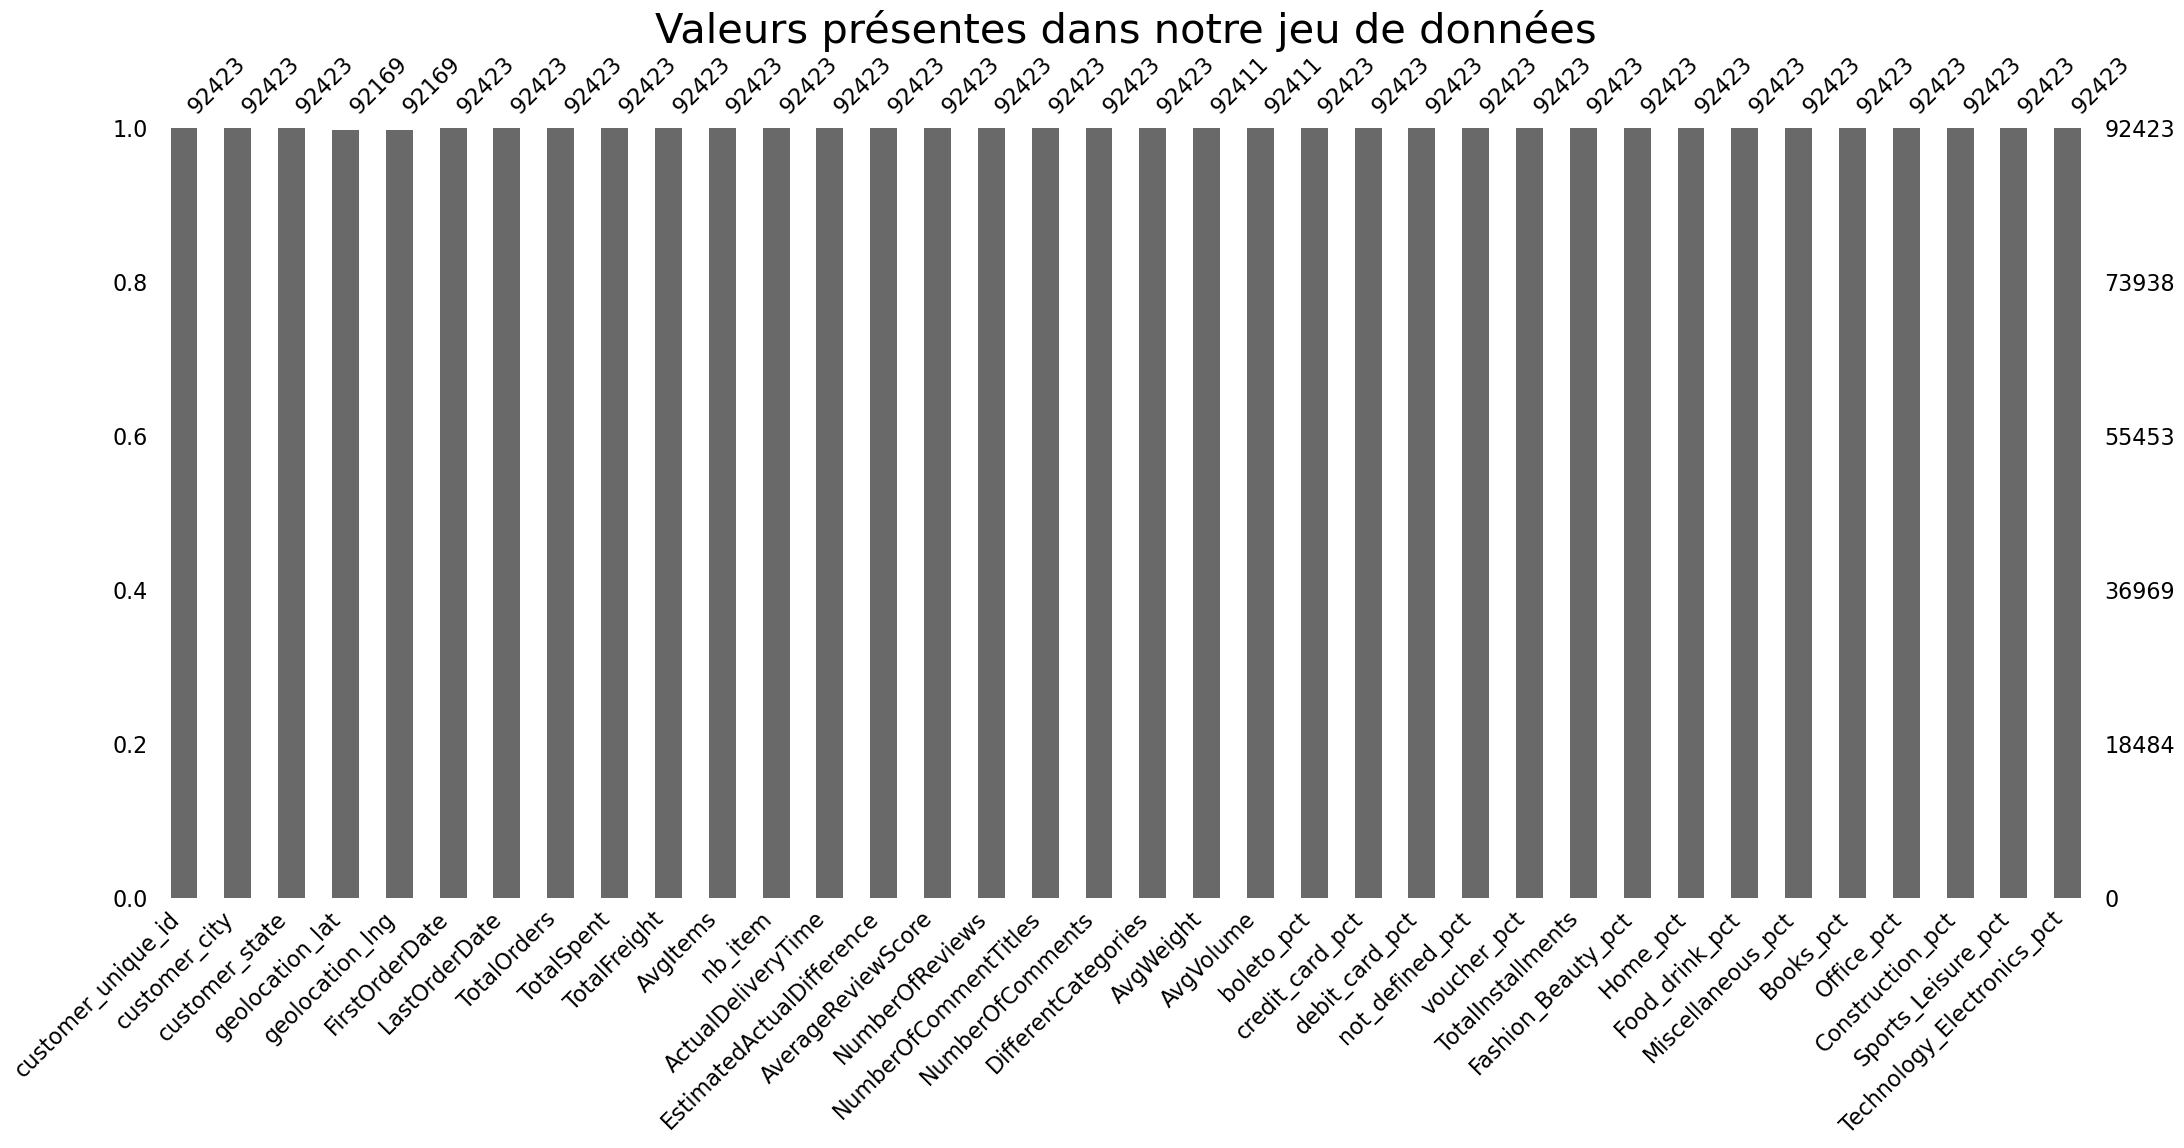

In [59]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_merged)

In [60]:
# Supprimer les lignes où la colonne 'AvgWeight' est NaN
df_merged = df_merged.dropna(subset=['AvgWeight'])

In [61]:
df_merged.shape

(92411, 36)

In [62]:
# Valeurs manquantes
missing_values_count = df_merged.isnull().sum()
total_cells = np.product(df_merged.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.02 %


In [63]:
percent_missing_values =  round((missing_values_count / len(df_merged)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
customer_unique_id                                     0   
customer_city                                          0   
customer_state                                         0   
geolocation_lat                                      254   
geolocation_lng                                      254   
FirstOrderDate                                         0   
LastOrderDate                                          0   
TotalOrders                                            0   
TotalSpent                                             0   
TotalFreight                                           0   
AvgItems                                               0   
nb_item                                                0   
ActualDeliveryTime                                     0   
EstimatedActualDifference                              0   
AverageReviewScore                                     0   
NumberOfReviews                                        0   
NumberOfCommentTitles                                  0   
NumberOfComments                                       0   
DifferentCategories                                    0   
AvgWeight                                              0   
AvgVolume                                              0   
boleto_pct                                             0   
credit_card_pct                                        0   
debit_card_pct                                         0   
not_defined_pct                                        0   
voucher_pct                                            0   
TotalInstallments                                      0   
Fashion_Beauty_pct                                     0   
Home_pct                                               0   
Food_drink_pct                                         0   
Miscellaneous_pct                                      0   
Books_pct                                              0   
Office_pct                                             0   
Construction_pct                                       0   
Sports_Leisure_pct                                     0   
Technology_Electronics_pct                             0   

                            Pourcentage de valeurs manquantes  
customer_unique_id                                       0.00  
customer_city                                            0.00  
customer_state                                           0.00  
geolocation_lat                                          0.27  
geolocation_lng                                          0.27  
FirstOrderDate                                           0.00  
LastOrderDate                                            0.00  
TotalOrders                                              0.00  
TotalSpent                                               0.00  
TotalFreight                                             0.00  
AvgItems                                                 0.00  
nb_item                                                  0.00  
ActualDeliveryTime                                       0.00  
EstimatedActualDifference                                0.00  
AverageReviewScore                                       0.00  
NumberOfReviews                                          0.00  
NumberOfCommentTitles                                    0.00  
NumberOfComments                                         0.00  
DifferentCategories                                      0.00  
AvgWeight                                                0.00  
AvgVolume                                                0.00  
boleto_pct                                               0.00  
credit_card_pct                                          0.00  
debit_card_pct                                           0.00  
not_defined_pct                                          0.00  
voucher_pct                                              0.00  
TotalInstallments                                        0.00  
Fashion_Beauty_

# Feature Engineering

In [64]:
df = df_merged.copy()
df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'FirstOrderDate', 'LastOrderDate',
       'TotalOrders', 'TotalSpent', 'TotalFreight', 'AvgItems', 'nb_item',
       'ActualDeliveryTime', 'EstimatedActualDifference', 'AverageReviewScore',
       'NumberOfReviews', 'NumberOfCommentTitles', 'NumberOfComments',
       'DifferentCategories', 'AvgWeight', 'AvgVolume', 'boleto_pct',
       'credit_card_pct', 'debit_card_pct', 'not_defined_pct', 'voucher_pct',
       'TotalInstallments', 'Fashion_Beauty_pct', 'Home_pct', 'Food_drink_pct',
       'Miscellaneous_pct', 'Books_pct', 'Office_pct', 'Construction_pct',
       'Sports_Leisure_pct', 'Technology_Electronics_pct'],
      dtype='object')

## Récense d'achat

In [65]:
# Trouver la date de référence
reference_date = df['LastOrderDate'].max()

# Calculer la récence d'achat comme le nombre de jours depuis la dernière commande
df['Recency'] = (reference_date - df['LastOrderDate']).dt.days

print(df[['customer_unique_id', 'Recency']].head())

                 customer_unique_id  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114
2  0000f46a3911fa3c0805444483337064      536
3  0000f6ccb0745a6a4b88665a16c9f078      320
4  0004aac84e0df4da2b147fca70cf8255      287


## Fréquence d'achat

In [66]:
df['Frequency'] = df['TotalOrders']

## Montant et Sensibilité aux frais de ports

In [67]:
# Calcul du cout total prix + frais de ports
df['TotalAmount'] = df['TotalSpent'] + df['TotalFreight']

# Calcul du pourcentage représenté par les frais de port dans le prix total
df['TotalFreightPct'] = (df['TotalFreight'] / df['TotalAmount']) * 100
df['TotalFreightPct'] = df['TotalFreightPct'].fillna(0)

# Calcul du panierMoyen
df['AvgBasket'] = df['TotalAmount']/df['TotalOrders']

df = df.drop(columns=['TotalFreight', 'TotalSpent'])
# Afficher les premières lignes pour vérifier le résultat
print(df[['customer_unique_id', 'TotalFreightPct']].head())

                 customer_unique_id  TotalFreightPct
0  0000366f3b9a7992bf8c76cfdf3221e2         8.456660
1  0000b849f77a49e4a4ce2b2a4ca5be3f        30.489150
2  0000f46a3911fa3c0805444483337064        19.972164
3  0000f6ccb0745a6a4b88665a16c9f078        40.417240
4  0004aac84e0df4da2b147fca70cf8255         8.578394


## Indice d'engagement

In [68]:
# Calcul de l'indice global d'engagement des clients
df['EngagementIndex'] = (
    0.5 * df['NumberOfReviews'] +
    0.25 * df['NumberOfCommentTitles'] +
    0.25 * df['NumberOfComments']
) / (df['nb_item'])

df['EngagementIndex'] = df['EngagementIndex'].fillna(0)
df = df.drop(columns=['NumberOfReviews','NumberOfCommentTitles','NumberOfComments'])

# Afficher les premières lignes pour vérifier le résultat
print(df[['customer_unique_id', 'EngagementIndex']].head())

                 customer_unique_id  EngagementIndex
0  0000366f3b9a7992bf8c76cfdf3221e2             1.00
1  0000b849f77a49e4a4ce2b2a4ca5be3f             0.50
2  0000f46a3911fa3c0805444483337064             0.50
3  0000f6ccb0745a6a4b88665a16c9f078             0.75
4  0004aac84e0df4da2b147fca70cf8255             0.50


## Position géographique

In [69]:
# Calculer la fréquence pour chaque position unique des customers
frequency_df = df.groupby(['geolocation_lat', 'geolocation_lng']).size().reset_index(name='number_of_customers')

In [70]:
# liste de points pour la heatmap
data_heatmap = frequency_df[['geolocation_lat', 'geolocation_lng', 'number_of_customers']].values.tolist()

# carte centrée sur la moyenne des coordonnées
map_center = [frequency_df['geolocation_lat'].mean(), frequency_df['geolocation_lng'].mean()]
map = folium.Map(location=map_center, zoom_start=5)

# Ajoutez la HeatMap à la carte avec un paramètre pour intensifier les couleurs en fonction du nombre de clients
HeatMap(data_heatmap, min_opacity=0.5,
        radius=10, blur=15, max_zoom=1).add_to(map)

# Affichez la carte
map

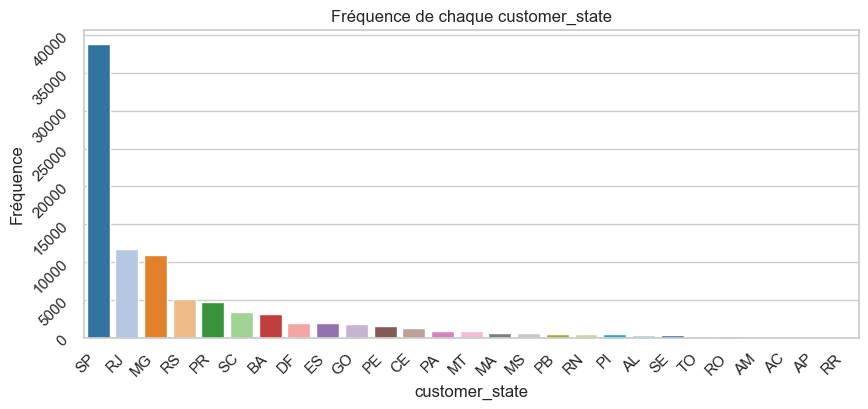

In [71]:
# Compter le nombre d'occurrences pour chaque customer_state
group_counts = df['customer_state'].value_counts().reset_index()
group_counts.columns = ['customer_state', 'Counts']

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Créer un graphique à barres
sns.barplot(x='customer_state', y='Counts', data=group_counts, hue='customer_state', palette="tab20", legend=False)

plt.yticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque customer_state')
plt.ylabel('Fréquence')
plt.xlabel('customer_state')
plt.xticks(rotation=45, ha="right")

plt.show()

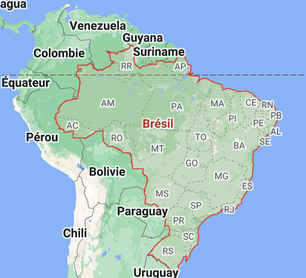

In [72]:
# Afficher les regions et etats
Image(filename="Carte_bresil.png", width=400, height=150)

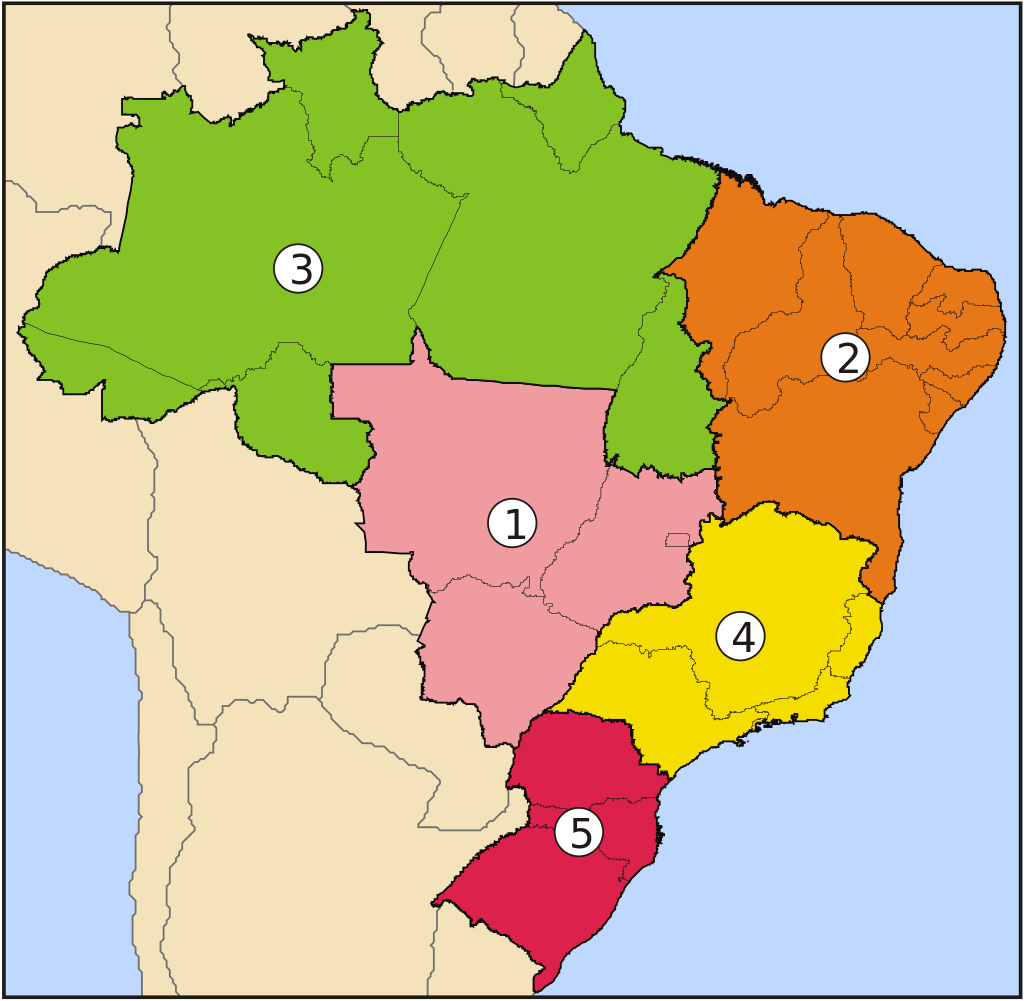

In [73]:
Image(filename="Brazil_Regions.png", width=400, height=150)

1. Région Centre-Ouest 2. Région Nord-Est 3. Région Nord 4. Région Sud-Est 5. Région Sud

In [74]:
region_dict = {
    'Nord': [
        'AC','AM','RR','AP','PA','RO','TO'
    ],
    'NordEst': [
        'MA','PI','CE','RN','PB','PE','AL','SE','BA',  
    ],
    'CentreOuest': [
        'MT','GO','MS','DF',
    ],
    'SudEst': [
        'SP','MG','ES','RJ'
    ],
    'Sud': [
        'RS','SC','PR'
    ]
}


In [75]:
# inverser le dictionnaire
state_to_region = {state: region for region, states in region_dict.items() for state in states}

# appliquer le mapping au DataFrame pour créer la colonne 'region'.
df['Region'] = df['customer_state'].map(state_to_region)


In [76]:
df = df.drop(columns=['customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng'])

In [77]:
df.head(5)

customer_unique_id      FirstOrderDate       LastOrderDate  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   TotalOrders  AvgItems  nb_item  ActualDeliveryTime  \
0            1       1.0        1            6.411227   
1            1       1.0        1            3.285590   
2            1       1.0        1           25.731759   
3            1       1.0        1           20.037083   
4            1       1.0        1           13.141134   

   EstimatedActualDifference  AverageReviewScore  DifferentCategories  \
0                   4.132905                 5.0                    1   
1                   4.248125                 4.0                    1   
2                   1.389734                 3.0                    1   
3                  11.108970                 4.0                    1   
4                   7.035463                 5.0                    1   

   AvgWeight  AvgVolume  boleto_pct  credit_card_pct  debit_card_pct  \
0     1500.0     7616.0         0.0            100.0             0.0   
1      375.0     5148.0         0.0            100.0             0.0   
2     1500.0    43750.0         0.0            100.0             0.0   
3      150.0     1045.0         0.0            100.0             0.0   
4     6050.0      528.0         0.0            100.0             0.0   

   not_defined_pct  voucher_pct  TotalInstallments  Fashion_Beauty_pct  \
0              0.0          0.0                8.0                 0.0   
1              0.0          0.0                1.0               100.0   
2              0.0          0.0                8.0                 0.0   
3              0.0          0.0                4.0                 0.0   
4              0.0          0.0                6.0                 0.0   

   Home_pct  Food_drink_pct  Miscellaneous_pct  Books_pct  Office_pct  \
0     100.0             0.0                0.0        0.0         0.0   
1       0.0             0.0                0.0        0.0         0.0   
2       0.0             0.0                0.0        0.0       100.0   
3       0.0             0.0                0.0        0.0         0.0   
4       0.0             0.0                0.0        0.0         0.0   

   Construction_pct  Sports_Leisure_pct  Technology_Electronics_pct  Recency  \
0               0.0                 0.0                         0.0      111   
1               0.0                 0.0                         0.0      114   
2               0.0                 0.0                         0.0      536   
3               0.0                 0.0                       100.0      320   
4               0.0                 0.0                       100.0      287   

   Frequency  TotalAmount  TotalFreightPct  AvgBasket  EngagementIndex  Region  
0          1       141.90         8.456660     141.90             1.00  SudEst  
1          1        27.19        30.489150      27.19             0.50  SudEst  
2          1        86.22        19.972164      86.22             0.50     Sud  
3          1        43.62        40.417240      43.62             0.75    Nord  
4          1       196.89         8.578394     196.89             0.50  SudEst

In [78]:
df.shape

(92411, 34)

In [79]:
df.columns

Index(['customer_unique_id', 'FirstOrderDate', 'LastOrderDate', 'TotalOrders',
       'AvgItems', 'nb_item', 'ActualDeliveryTime',
       'EstimatedActualDifference', 'AverageReviewScore',
       'DifferentCategories', 'AvgWeight', 'AvgVolume', 'boleto_pct',
       'credit_card_pct', 'debit_card_pct', 'not_defined_pct', 'voucher_pct',
       'TotalInstallments', 'Fashion_Beauty_pct', 'Home_pct', 'Food_drink_pct',
       'Miscellaneous_pct', 'Books_pct', 'Office_pct', 'Construction_pct',
       'Sports_Leisure_pct', 'Technology_Electronics_pct', 'Recency',
       'Frequency', 'TotalAmount', 'TotalFreightPct', 'AvgBasket',
       'EngagementIndex', 'Region'],
      dtype='object')

In [80]:
# Suppression des indicateurs liés ou qui n'apporte plus dinformation pertinante
df = df.drop(columns=['AvgItems', 'TotalAmount','customer_unique_id'])

In [81]:
df.dtypes

FirstOrderDate                datetime64[ns]
LastOrderDate                 datetime64[ns]
TotalOrders                            int64
nb_item                                int64
ActualDeliveryTime                   float64
EstimatedActualDifference            float64
AverageReviewScore                   float64
DifferentCategories                    int64
AvgWeight                            float64
AvgVolume                            float64
boleto_pct                           float64
credit_card_pct                      float64
debit_card_pct                       float64
not_defined_pct                      float64
voucher_pct                          float64
TotalInstallments                    float64
Fashion_Beauty_pct                   float64
Home_pct                             float64
Food_drink_pct                       float64
Miscellaneous_pct                    float64
Books_pct                            float64
Office_pct                           float64
Constructi

In [82]:
# Valeurs manquantes
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

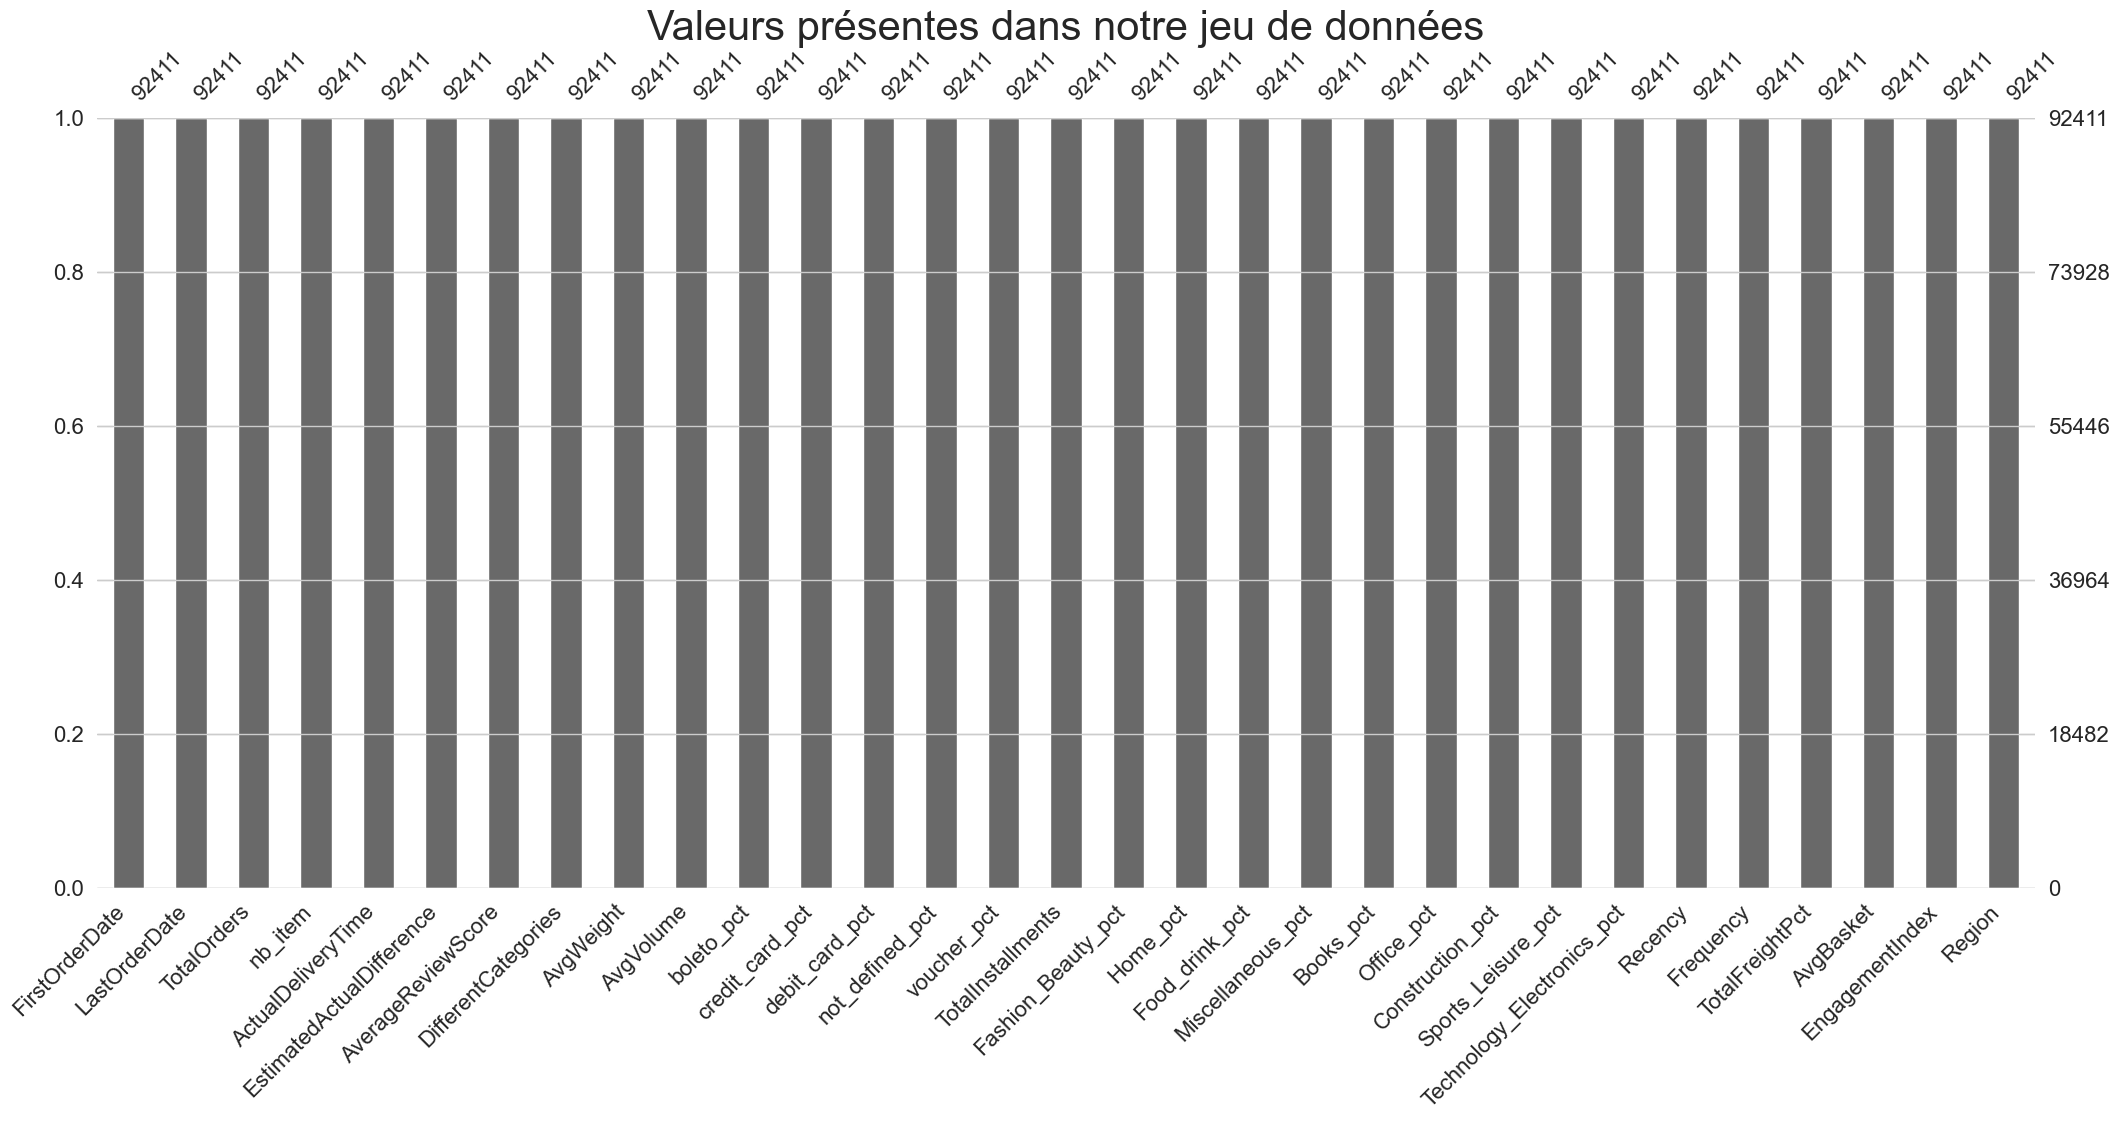

In [83]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df)

# Analyse exploratoire

## Analyse univariée

### Variables numériques

In [84]:
df.describe()

FirstOrderDate                  LastOrderDate  \
count                          92411                          92411   
mean   2018-01-01 17:30:15.408782336  2018-01-04 11:18:58.793282048   
min              2016-10-03 09:44:50            2016-10-03 16:56:50   
25%       2017-09-13 19:30:25.500000     2017-09-18 10:34:25.500000   
50%              2018-01-20 14:41:44            2018-01-23 13:45:20   
75%       2018-05-05 17:47:54.500000            2018-05-07 20:43:21   
max              2018-08-29 15:00:37            2018-08-29 15:00:37   
std                              NaN                            NaN   

        TotalOrders       nb_item  ActualDeliveryTime  \
count  92411.000000  92411.000000        92411.000000   
mean       1.034531      1.179318           12.527061   
min        1.000000      1.000000            0.533414   
25%        1.000000      1.000000            6.778009   
50%        1.000000      1.000000           10.221331   
75%        1.000000      1.000000           15.663704   
max        9.000000     24.000000          208.351759   
std        0.206977      0.614610            9.461174   

       EstimatedActualDifference  AverageReviewScore  DifferentCategories  \
count               92411.000000        92411.000000         92411.000000   
mean                   11.182910            4.153603             1.025246   
min                  -188.975081            1.000000             1.000000   
25%                     6.410706            4.000000             1.000000   
50%                    11.878588            5.000000             1.000000   
75%                    16.229965            5.000000             1.000000   
max                   146.016123            5.000000             5.000000   
std                    10.068741            1.279686             0.168384   

           AvgWeight     AvgVolume    boleto_pct  credit_card_pct  \
count   92411.000000  9.241100e+04  92411.000000     92411.000000   
mean     2385.512058  1.730286e+04     19.972207        75.517297   
min         0.000000  1.680000e+02      0.000000         0.000000   
25%       300.000000  2.992000e+03      0.000000        68.431349   
50%       750.000000  7.392000e+03      0.000000       100.000000   
75%      2100.000000  1.984375e+04      0.000000       100.000000   
max    184400.000000  1.476000e+06    100.000000       100.000000   
std      4745.508611  2.992622e+04     39.905550        42.517009   

       debit_card_pct  not_defined_pct   voucher_pct  TotalInstallments  \
count    92411.000000          92411.0  92411.000000       92411.000000   
mean         1.546177              0.0      2.964319           3.070035   
min          0.000000              0.0      0.000000           0.000000   
25%          0.000000              0.0      0.000000           1.000000   
50%          0.000000              0.0      0.000000           2.000000   
75%          0.000000              0.0      0.000000           4.000000   
max        100.000000              0.0    100.000000          64.000000   
std         12.294783              0.0     15.840187           2.952146   

       Fashion_Beauty_pct      Home_pct  Food_drink_pct  Miscellaneous_pct  \
count        92411.000000  92411.000000    92411.000000       92411.000000   
mean            21.355479     32.637972        0.981589          11.082815   
min              0.000000      0.000000        0.000000           0.000000   
25%              0.000000      0.000000        0.000000           0.000000   
50%              0.000000      0.000000        0.000000           0.000000   
75%              0.000000    100.000000        0.000000           0.000000   
max            100.000000    100.000000      100.000000         100.000000   
std             40.818030     46.669043        9.787783          31.210850   

          Books_pct    Office_pct  Construction_pct  Sports_Leisure_pct  \
count  92411.000000  92411.000000      92411.000000        92411.000000   
mean       0.827313    

In [85]:
# plus aucune valeur dans le not_defined_pct donc on supprime cette colonne
df = df.drop(columns=['not_defined_pct'])

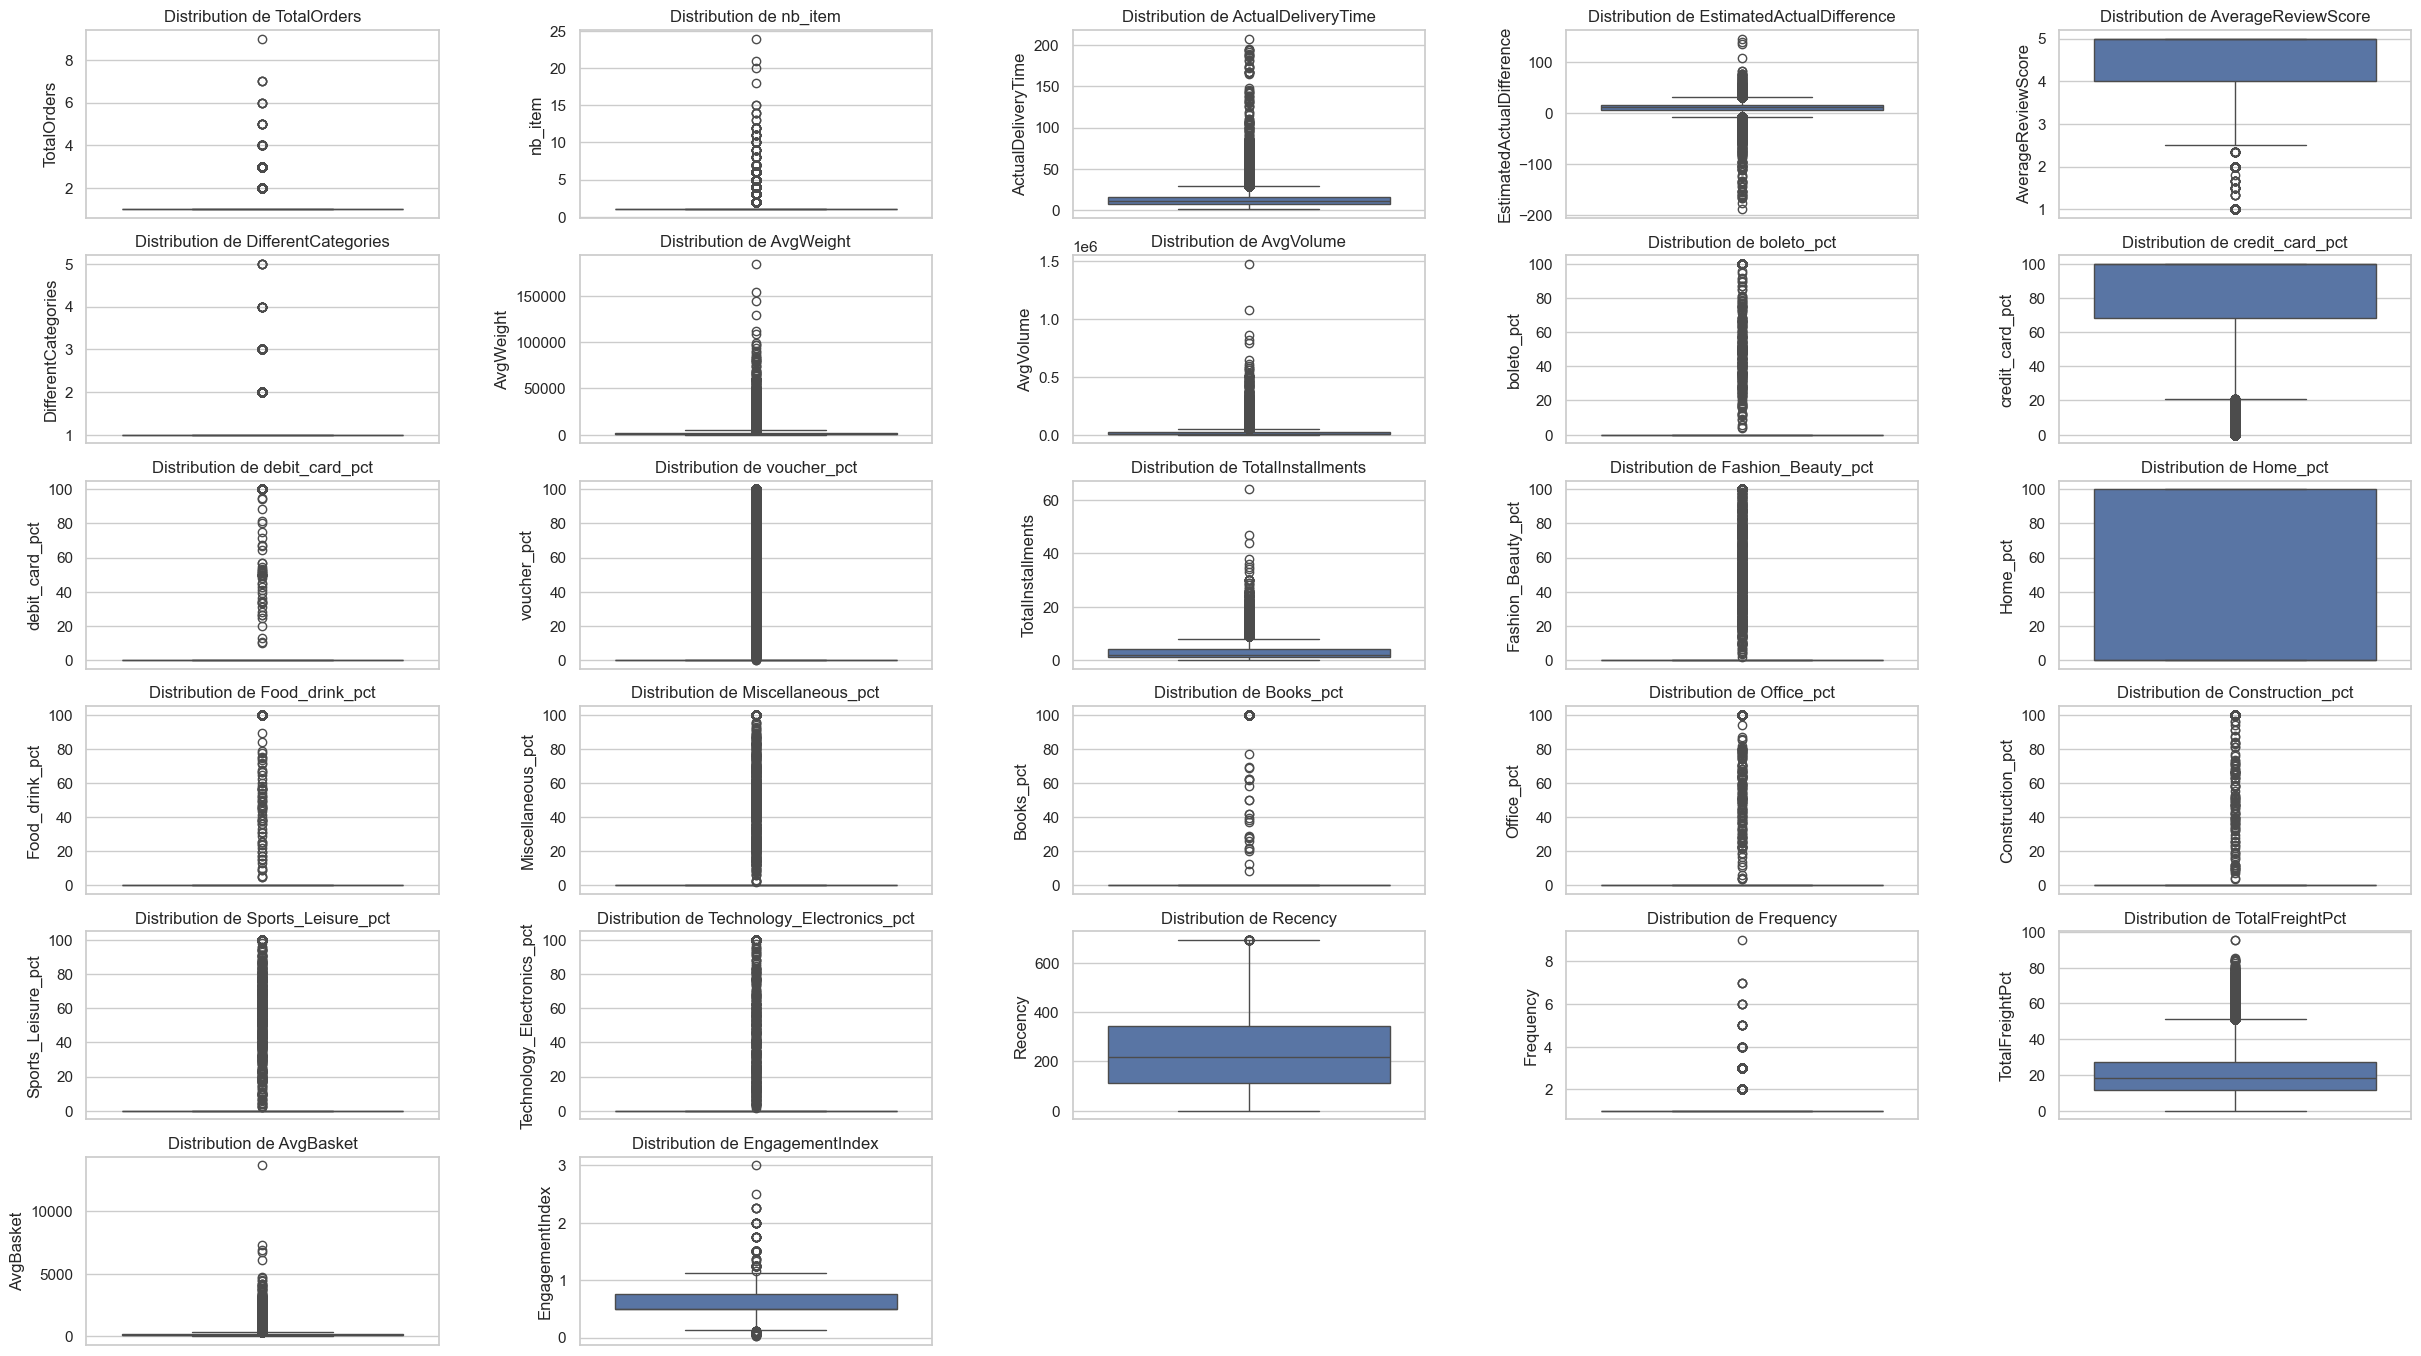

In [86]:
numerics_col = df.select_dtypes(include=['number'])

# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
axes = axes.flatten()
plt.subplots_adjust(wspace=0.4)

for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Distribution de {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 35):
    fig.delaxes(axes.flatten()[j])

plt.show()

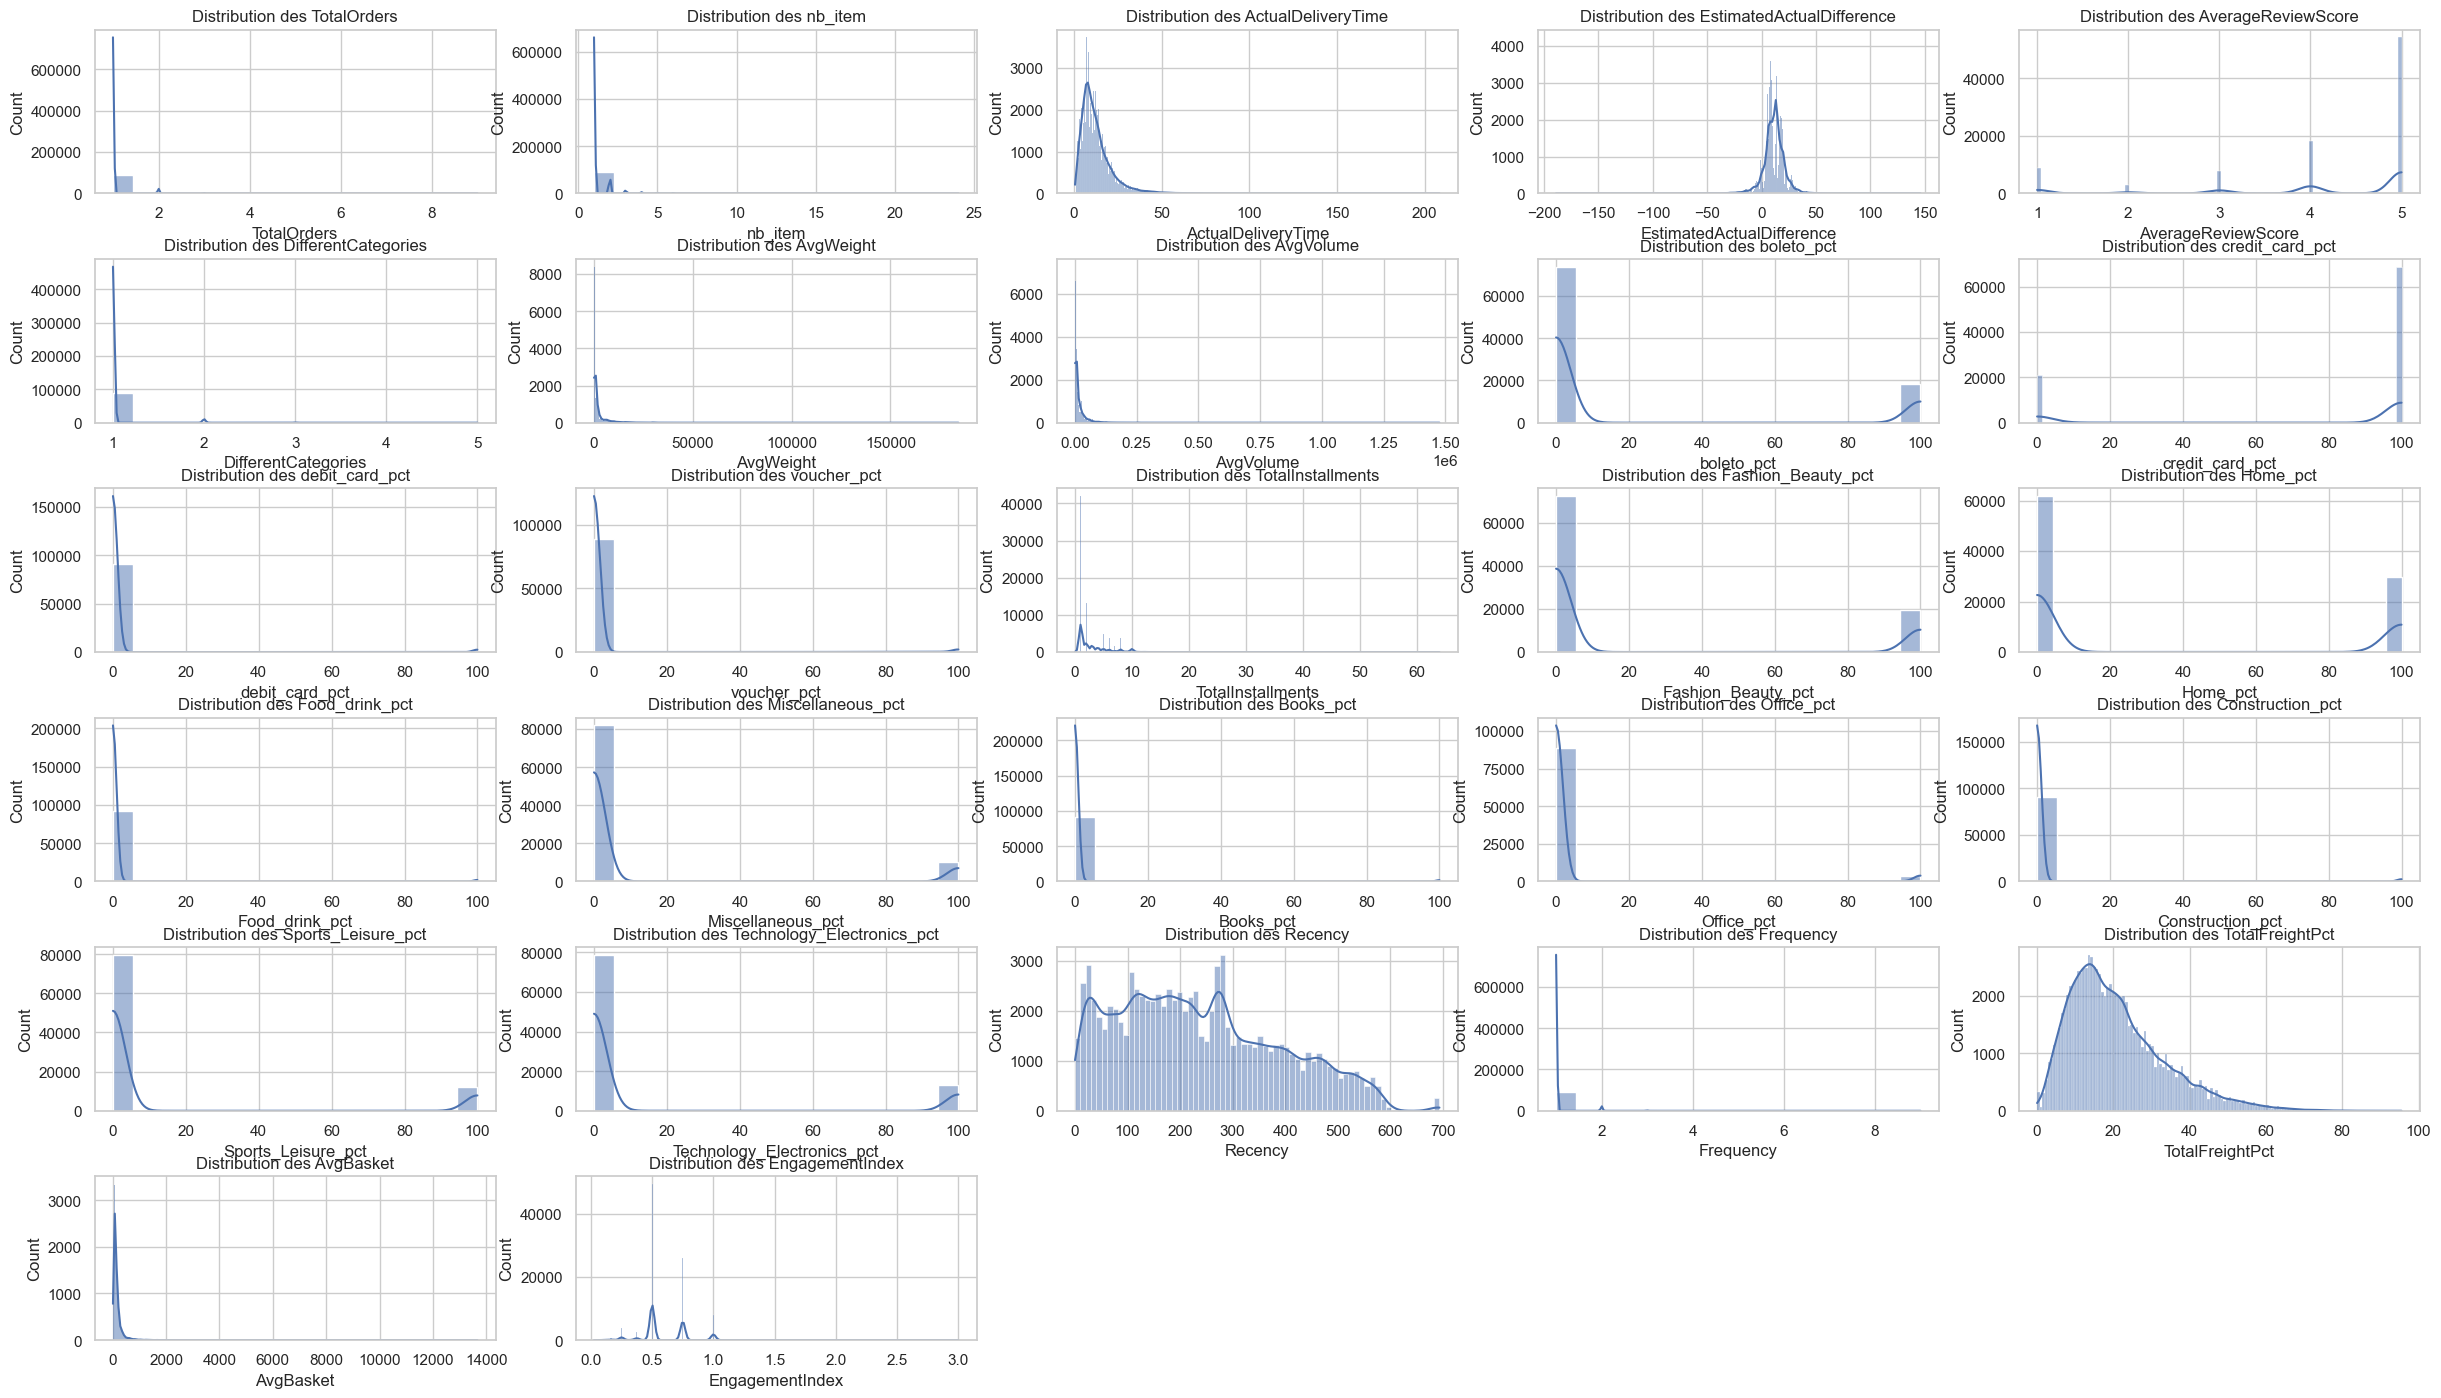

In [87]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4)

# Density plot
for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution des {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 35):
    fig.delaxes(axes.flatten()[j])

plt.show()

Constat :
    la grande majorité des clients n'a fait qu'une seule commande, ainsi les indicateurs de categories n'ont pas beaucoup d'intérêt par rapport à cette base de donnée.

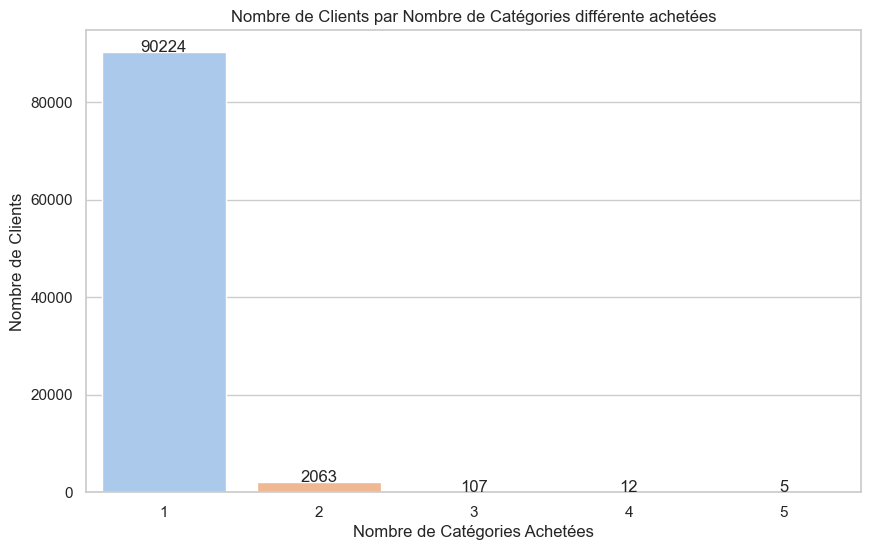

In [88]:
# Compter le nombre de clients pour chaque nombre de catégories achetées
category_counts = df['DifferentCategories'].value_counts().sort_index()

# Créer un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel',hue=category_counts.index, legend=False)

for index, value in enumerate(category_counts.values):
    plt.text(index, value, f'{value}', ha='center')

plt.title('Nombre de Clients par Nombre de Catégories différente achetées')
plt.xlabel('Nombre de Catégories Achetées')
plt.ylabel('Nombre de Clients')
plt.xticks(range(len(category_counts)), category_counts.index) 

plt.show()

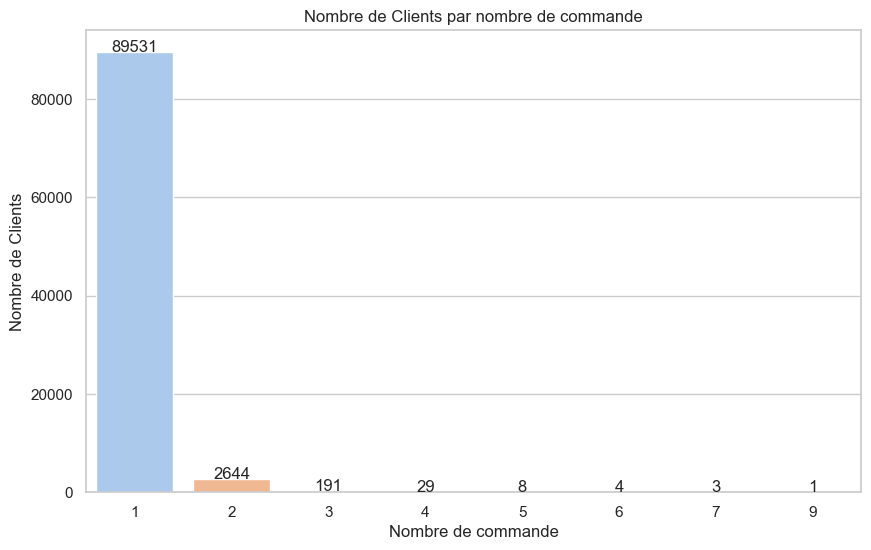

In [89]:
# Compter le nombre de clients pour chaque TotalOrders
TotalOrders_counts = df['TotalOrders'].value_counts().sort_index()

# Créer un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=TotalOrders_counts.index, y=TotalOrders_counts.values, palette='pastel',hue=TotalOrders_counts.index, legend=False)

for index, value in enumerate(TotalOrders_counts.values):
    plt.text(index, value, f'{value}', ha='center')

plt.title('Nombre de Clients par nombre de commande')
plt.xlabel('Nombre de commande')
plt.ylabel('Nombre de Clients')
plt.xticks(range(len(TotalOrders_counts)), TotalOrders_counts.index) 

plt.show()

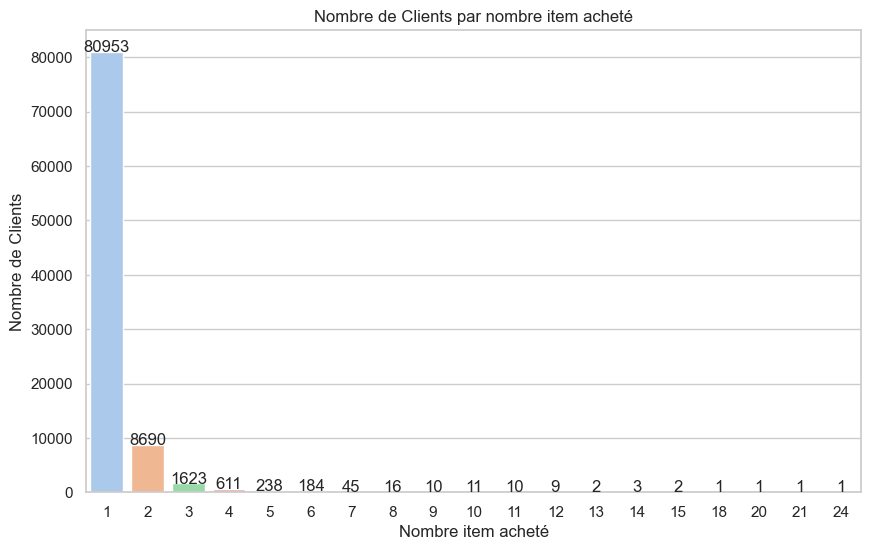

In [91]:
# Compter le nombre de clients pour chaque nb_item
nb_item_counts = df['nb_item'].value_counts().sort_index()

# Créer un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nb_item_counts.index, y=nb_item_counts.values, palette='pastel',hue=nb_item_counts.index, legend=False)

for index, value in enumerate(nb_item_counts.values):
    plt.text(index, value, f'{value}', ha='center')

plt.title('Nombre de Clients par nombre item acheté')
plt.xlabel('Nombre item acheté')
plt.ylabel('Nombre de Clients')
plt.xticks(range(len(nb_item_counts)), nb_item_counts.index) 

plt.show()

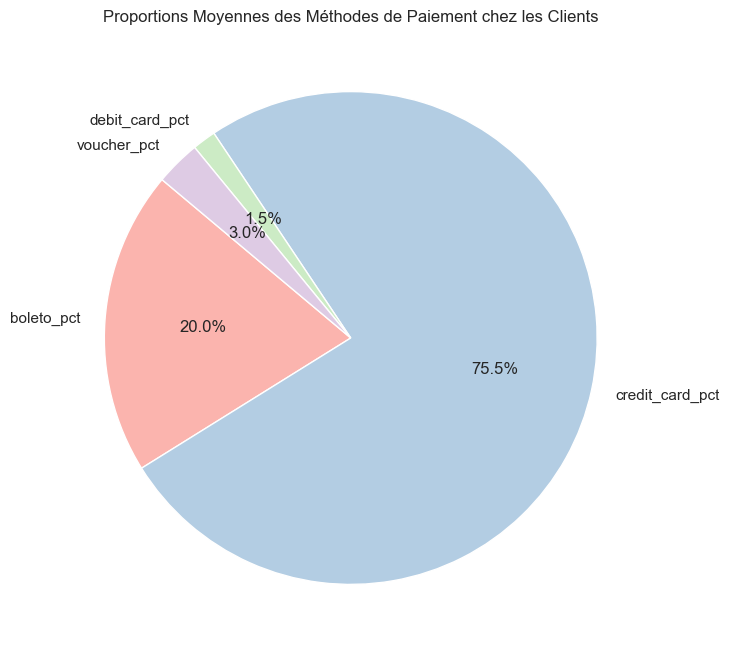

In [92]:
# Calculer la moyenne des pourcentages d'utilisation pour chaque moyen de paiement
payment_means_pct_avg = df[['boleto_pct', 'credit_card_pct', 'debit_card_pct', 'voucher_pct']].mean()

colors = sns.color_palette("Pastel1")

# Création du diagramme circulaire avec la palette de couleurs pastel
plt.figure(figsize=(8, 8))
plt.pie(payment_means_pct_avg, labels=payment_means_pct_avg.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportions Moyennes des Méthodes de Paiement chez les Clients')
plt.show()


In [93]:
# features à supprimer
df = df.drop(columns=['TotalOrders'])
numerics_col = numerics_col.drop(columns=['TotalOrders'])

### Distribution des clients par région

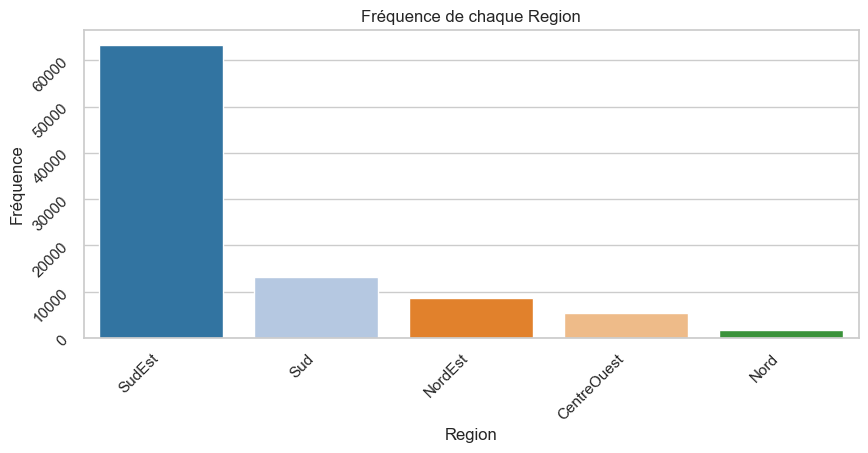

In [94]:
# Compter le nombre d'occurrences pour chaque region
group_counts_region = df['Region'].value_counts().reset_index()
group_counts_region.columns = ['Region', 'Counts']

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Créer un graphique à barres
sns.barplot(x='Region', y='Counts', data=group_counts_region, hue='Region', palette="tab20", legend=False)

plt.yticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque Region')
plt.ylabel('Fréquence')
plt.xlabel('Region')
plt.xticks(rotation=45, ha="right")

plt.show()

## Analyse bivariée

### Pairplot

In [95]:
print(numerics_col.columns.tolist())

['nb_item', 'ActualDeliveryTime', 'EstimatedActualDifference', 'AverageReviewScore', 'DifferentCategories', 'AvgWeight', 'AvgVolume', 'boleto_pct', 'credit_card_pct', 'debit_card_pct', 'voucher_pct', 'TotalInstallments', 'Fashion_Beauty_pct', 'Home_pct', 'Food_drink_pct', 'Miscellaneous_pct', 'Books_pct', 'Office_pct', 'Construction_pct', 'Sports_Leisure_pct', 'Technology_Electronics_pct', 'Recency', 'Frequency', 'TotalFreightPct', 'AvgBasket', 'EngagementIndex']


# Transformation des données

## Normalisation des données

In [96]:
columns = [ 'Recency', 'Frequency','AvgBasket', 'TotalFreightPct', 'nb_item',
            'AverageReviewScore', 'EngagementIndex', 
            'ActualDeliveryTime', 'EstimatedActualDifference', 
            'AvgWeight', 'AvgVolume', 'DifferentCategories',  
            'TotalInstallments', 'boleto_pct', 'voucher_pct', 'debit_card_pct', 'credit_card_pct']


In [97]:
df_transformed = df[columns]
df_transformed.columns.tolist()

['Recency',
 'Frequency',
 'AvgBasket',
 'TotalFreightPct',
 'nb_item',
 'AverageReviewScore',
 'EngagementIndex',
 'ActualDeliveryTime',
 'EstimatedActualDifference',
 'AvgWeight',
 'AvgVolume',
 'DifferentCategories',
 'TotalInstallments',
 'boleto_pct',
 'voucher_pct',
 'debit_card_pct',
 'credit_card_pct']

## Standardisation

In [98]:
standard_scaler = StandardScaler()
df_normalized = pd.DataFrame(standard_scaler.fit_transform(df_transformed), columns=df_transformed.columns)

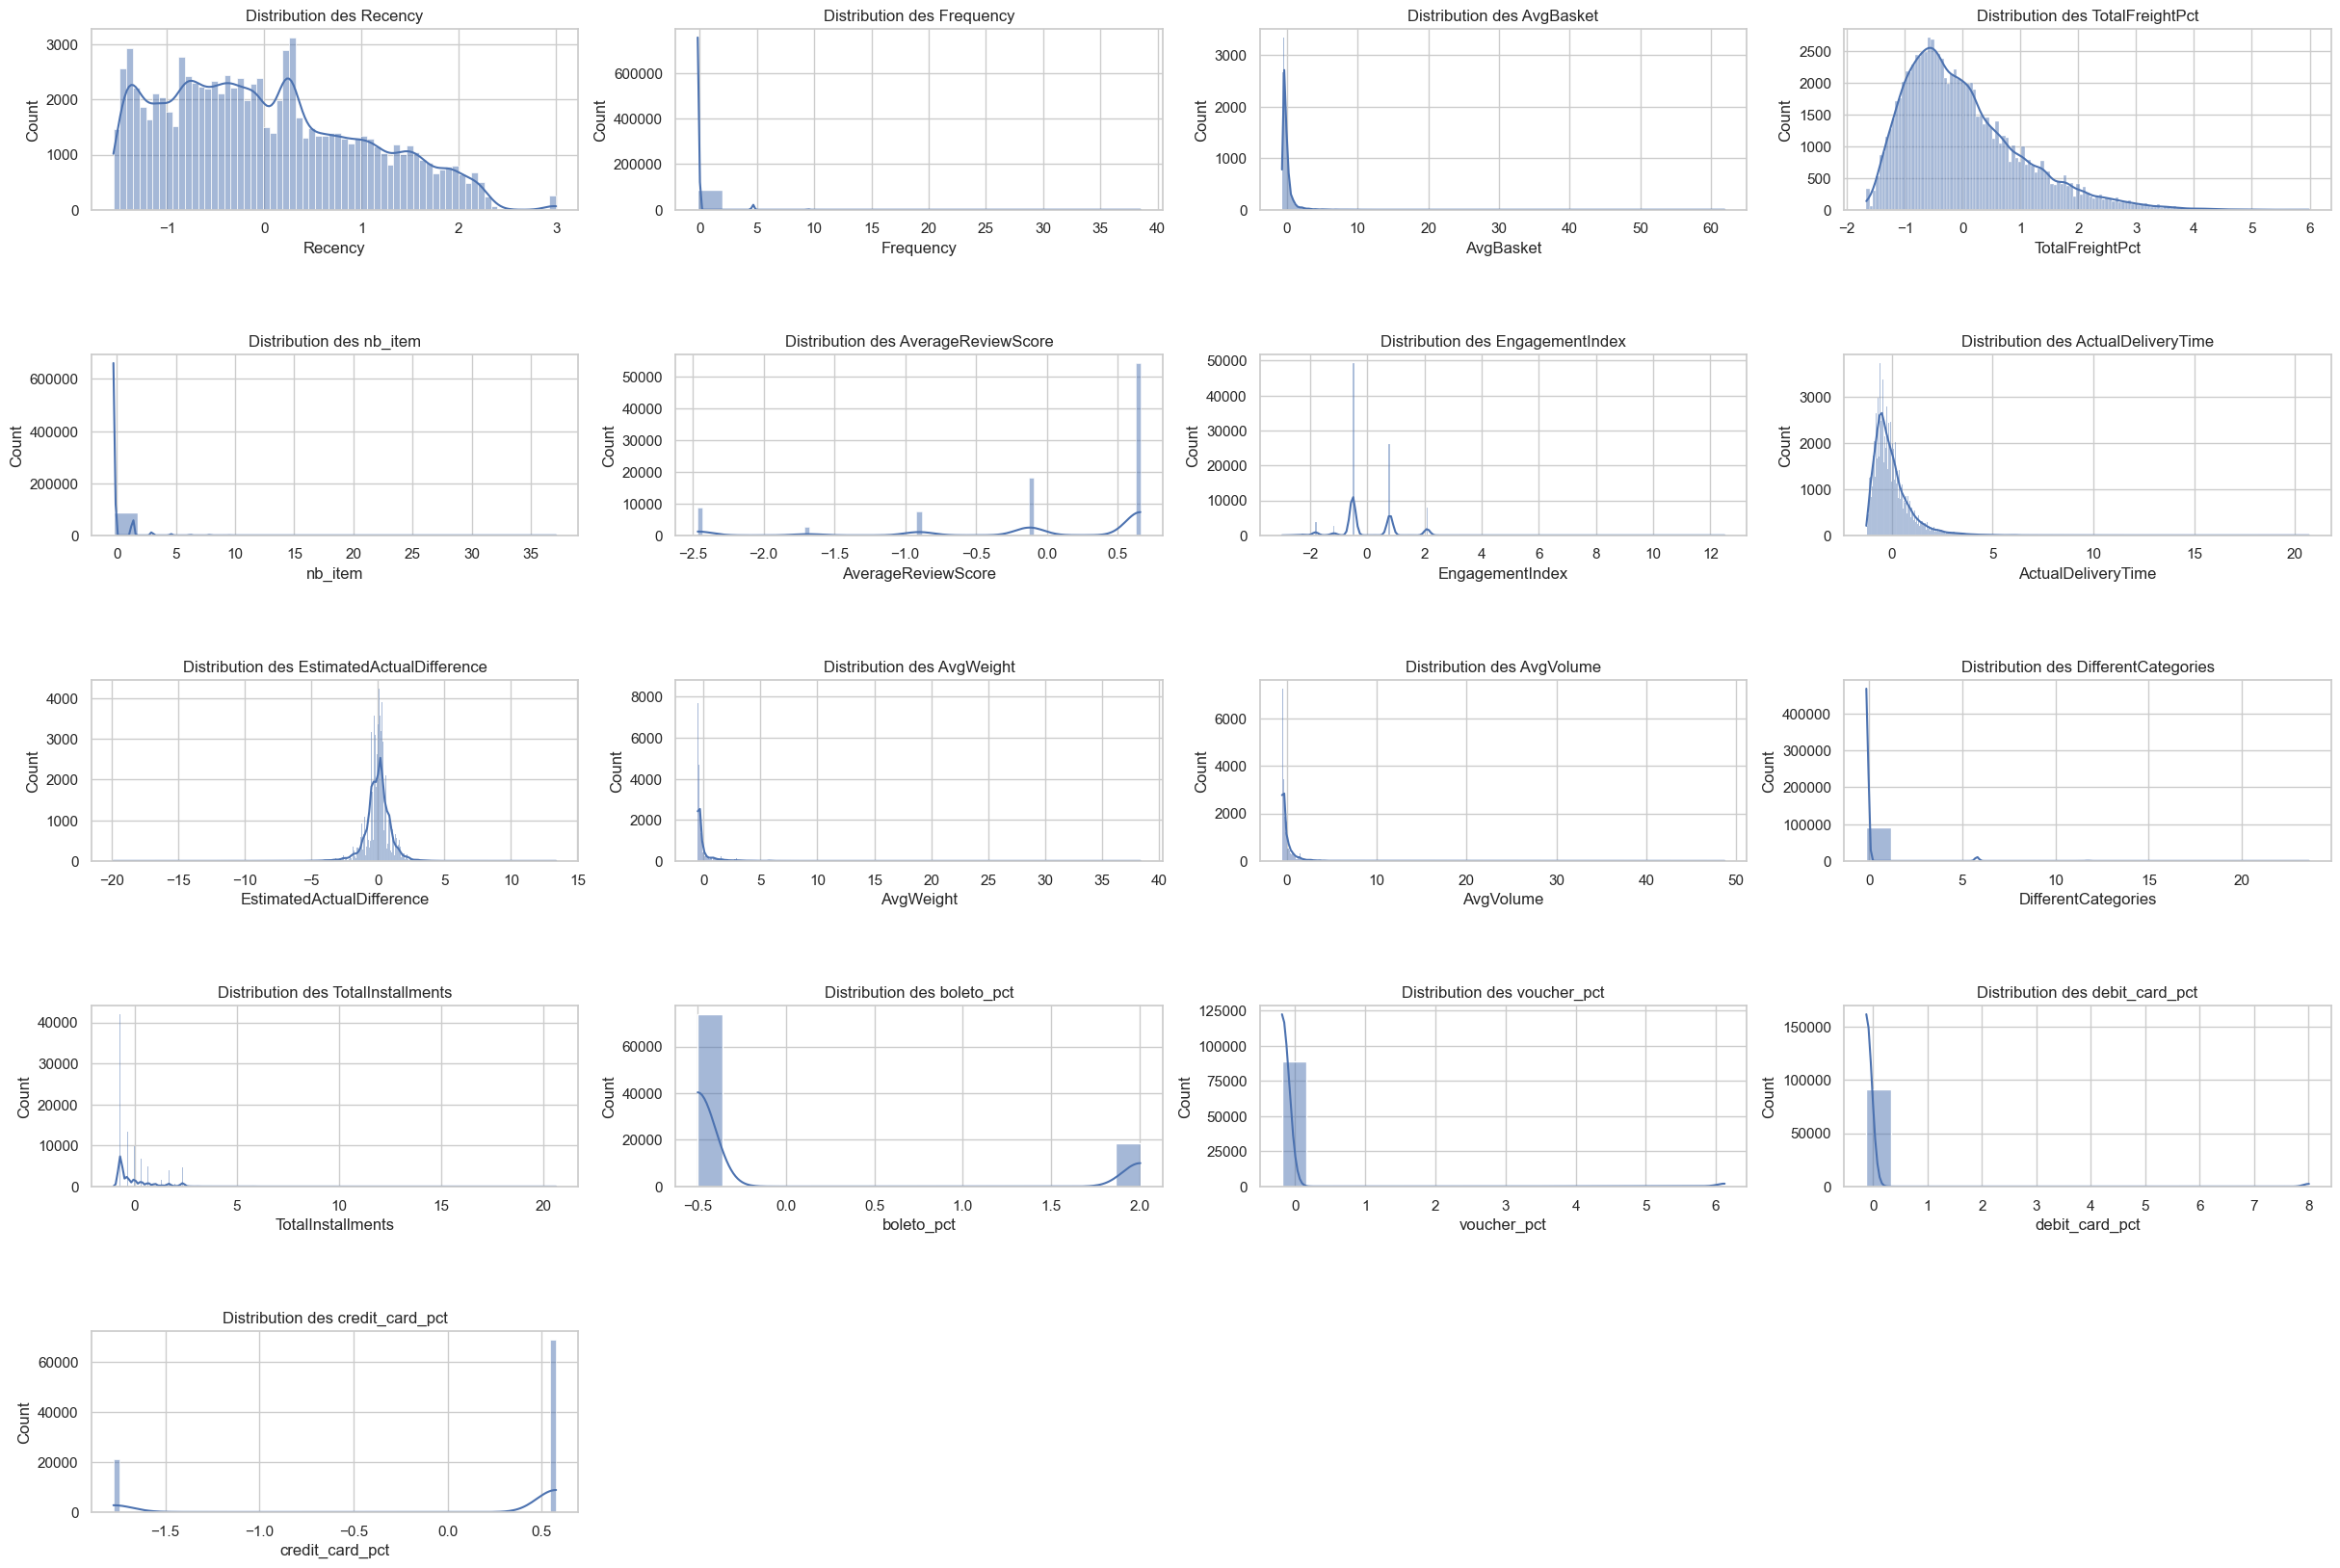

In [99]:
normalized_col = df_normalized.select_dtypes(include=['number'])

# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30,20))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.8)

# Density plot
for i, (ax, column) in enumerate(zip(axes.flatten(), normalized_col)):
    sns.histplot(data=df_normalized, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution des {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 20):
    fig.delaxes(axes.flatten()[j])

plt.show()

In [100]:
df_normalized.describe()

Recency     Frequency     AvgBasket  TotalFreightPct  \
count  9.241100e+04  9.241100e+04  9.241100e+04     9.241100e+04   
mean   7.842720e-18 -2.794161e-16 -2.706507e-17     2.800312e-16   
std    1.000005e+00  1.000005e+00  1.000005e+00     1.000005e+00   
min   -1.551721e+00 -1.668332e-01 -6.900248e-01    -1.666786e+00   
25%   -8.107091e-01 -1.668332e-01 -4.480356e-01    -7.326024e-01   
50%   -1.221582e-01 -1.668332e-01 -2.495567e-01    -1.999287e-01   
75%    7.106604e-01 -1.668332e-01  7.465062e-02     5.306908e-01   
max    2.999272e+00  3.848493e+01  6.191398e+01     5.987645e+00   

            nb_item  AverageReviewScore  EngagementIndex  ActualDeliveryTime  \
count  9.241100e+04        9.241100e+04     9.241100e+04        9.241100e+04   
mean   8.084922e-17       -4.963211e-17     8.246389e-17       -8.131055e-17   
std    1.000005e+00        1.000005e+00     1.000005e+00        1.000005e+00   
min   -2.917611e-01       -2.464370e+00    -2.975137e+00       -1.267677e+00   
25%   -2.917611e-01       -1.200325e-01    -5.047505e-01       -6.076500e-01   
50%   -2.917611e-01        6.614135e-01    -5.047505e-01       -2.437057e-01   
75%   -2.917611e-01        6.614135e-01     7.954532e-01        3.315297e-01   
max    3.713052e+01        6.614135e-01     1.249729e+01        2.069783e+01   

       EstimatedActualDifference     AvgWeight     AvgVolume  \
count               9.241100e+04  9.241100e+04  9.241100e+04   
mean                1.468588e-17  4.828655e-17 -2.637307e-17   
std                 1.000005e+00  1.000005e+00  1.000005e+00   
min                -1.987925e+01 -5.026911e-01 -5.725734e-01   
25%                -4.739649e-01 -4.394731e-01 -4.782075e-01   
50%                 6.909324e-02 -3.446461e-01 -3.311784e-01   
75%                 5.012625e-01 -6.016502e-02  8.490548e-02   
max                 1.339134e+01  3.835531e+01  4.874338e+01   

       DifferentCategories  TotalInstallments    boleto_pct   voucher_pct  \
count         9.241100e+04       9.241100e+04  9.241100e+04  9.241100e+04   
mean         -6.586347e-16      -6.074263e-18 -2.629618e-17  4.305807e-18   
std           1.000005e+00       1.000005e+00  1.000005e+00  1.000005e+00   
min          -1.499318e-01      -1.039939e+00 -5.004897e-01 -1.871402e-01   
25%          -1.499318e-01      -7.012004e-01 -5.004897e-01 -1.871402e-01   
50%          -1.499318e-01      -3.624619e-01 -5.004897e-01 -1.871402e-01   
75%          -1.499318e-01       3.150149e-01 -5.004897e-01 -1.871402e-01   
max           2.360549e+01       2.063932e+01  2.005441e+00  6.125951e+00   

       debit_card_pct  credit_card_pct  
count    9.241100e+04     9.241100e+04  
mean    -1.080296e-17     7.796586e-17  
std      1.000005e+00     1.000005e+00  
min     -1.257595e-01    -1.776176e+00  
25%     -1.257595e-01    -1.666624e-01  
50%     -1.257595e-01     5.758363e-01  
75%     -1.257595e-01     5.758363e-01  
max      8.007815e+00     5.758363e-01

In [101]:
df_normalized.head(5)

Recency  Frequency  AvgBasket  TotalFreightPct   nb_item  \
0 -0.823824  -0.166833  -0.083401        -0.989295 -0.291761   
1 -0.804152  -0.166833  -0.609331         0.775801 -0.291761   
2  1.963167  -0.166833  -0.338687        -0.066750 -0.291761   
3  0.546720  -0.166833  -0.534002         1.571173 -0.291761   
4  0.330318  -0.166833   0.168721        -0.979542 -0.291761   

   AverageReviewScore  EngagementIndex  ActualDeliveryTime  \
0            0.661413         2.095657           -0.646417   
1           -0.120032        -0.504750           -0.976784   
2           -0.901478        -0.504750            1.395680   
3           -0.120032         0.795453            0.793777   
4            0.661413        -0.504750            0.064905   

   EstimatedActualDifference  AvgWeight  AvgVolume  DifferentCategories  \
0                  -0.700191  -0.186601  -0.323693            -0.149932   
1                  -0.688748  -0.423669  -0.406163            -0.149932   
2                  -0.972637  -0.186601   0.883749            -0.149932   
3                  -0.007344  -0.471082  -0.543268            -0.149932   
4                  -0.411915   0.772205  -0.560544            -0.149932   

   TotalInstallments  boleto_pct  voucher_pct  debit_card_pct  credit_card_pct  
0           1.669969    -0.50049     -0.18714       -0.125759         0.575836  
1          -0.701200    -0.50049     -0.18714       -0.125759         0.575836  
2           1.669969    -0.50049     -0.18714       -0.125759         0.575836  
3           0.315015    -0.50049     -0.18714       -0.125759         0.575836  
4           0.992492    -0.50049     -0.18714       -0.125759         0.575836

# Selection des features

## Corrélations

### Variables numériques seulement

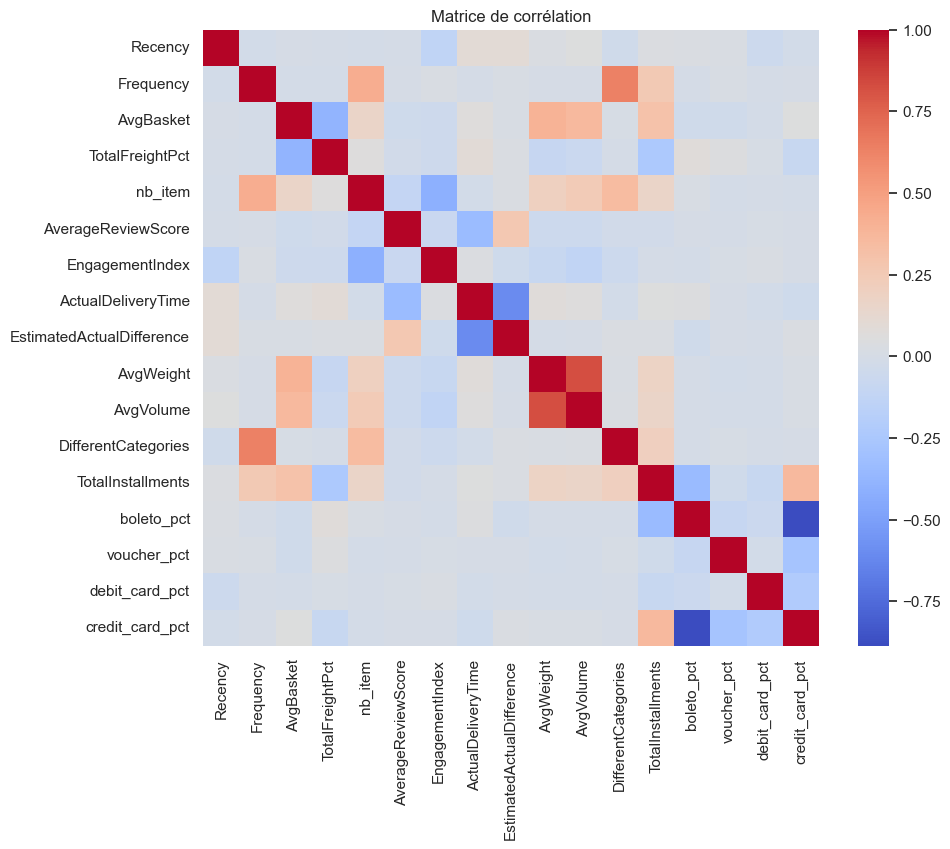

In [102]:
# Calcul de la matrice de corrélation
corr_matrix = df_normalized.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

### Toutes les données

In [103]:
# colonnes catégorielles et numériques
categorical_cols = ['Region']
numerical_cols = numerics_col.columns.tolist()

# Création du transformateur avec OneHotEncoder pour les catégorielles et StandardScaler pour les numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# fit_transform
data_processed = preprocessor.fit_transform(df)

# noms des features
numeric_features = list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols))
categorical_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
features = numeric_features + categorical_features

# Transformer en DataFrame 
df_processed = pd.DataFrame(data_processed, columns=features, index=df.index)


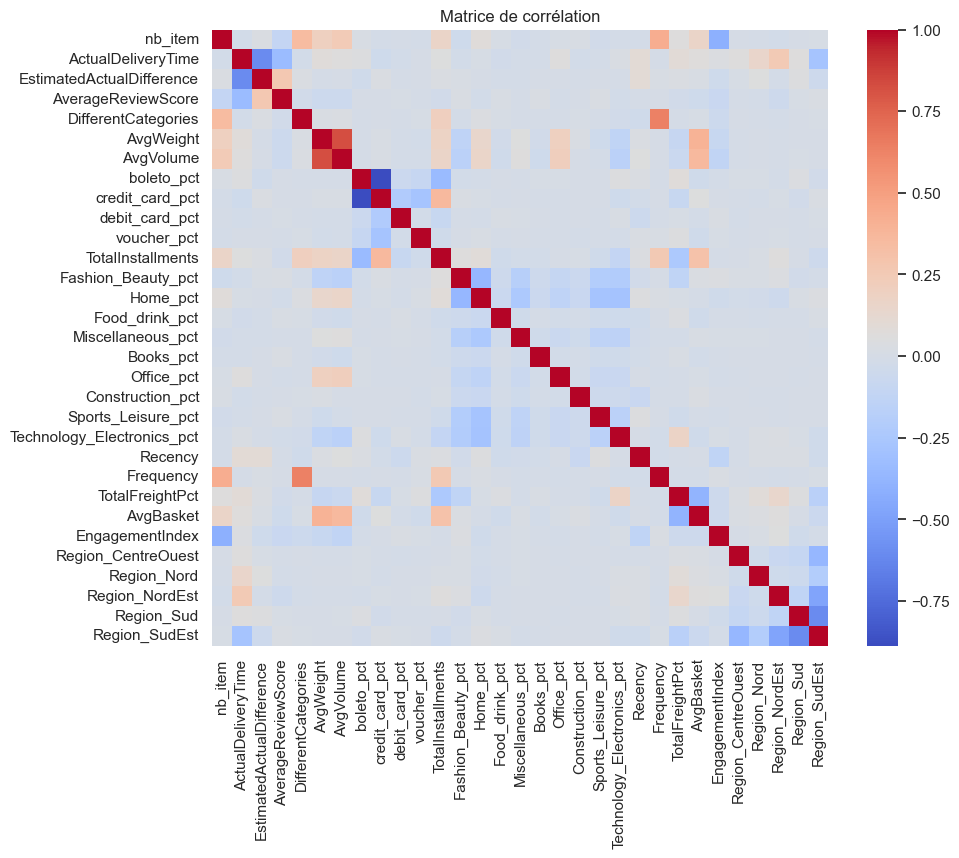

In [104]:
# Calcul de la matrice de corrélation
corr_matrix = df_processed.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## ACP

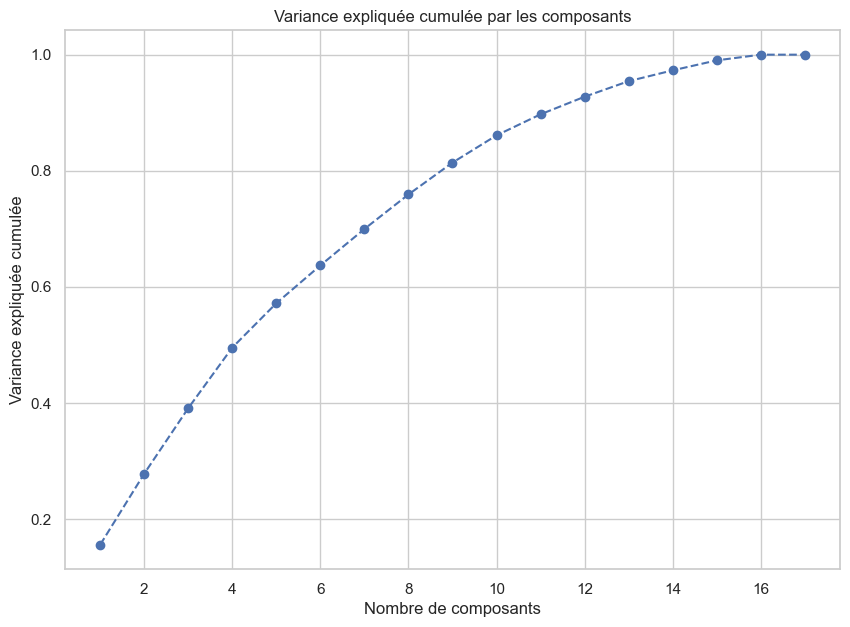

In [105]:
# Création de l'ACP
pca = PCA()

# Application de l'ACP sur les données prétraitées
X_pca = pca.fit_transform(df_normalized)

# Combien de composants choisir ? Afficher la variance expliquée cumulée
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par les composants')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.show()


In [106]:
# Appliquez la PCA
pca = PCA(n_components=8) 
principal_components = pca.fit_transform(df_normalized)

# Créez un DataFrame avec les composants principaux
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8' 
                                                               ], index=df_normalized.index)


In [107]:
principal_df.head(5)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.318717 -1.704281 -0.529639  0.333568  2.043315  0.279962  0.038322   
1 -0.848480 -0.810891  0.202920  0.250350 -0.789634  0.860103 -0.470408   
2  1.165800 -0.108762 -1.323833  1.446196 -1.060040 -1.384436  0.509121   
3 -0.722751 -0.805338 -0.246467  1.094354 -0.856866  0.161914  0.334217   
4  0.867640 -0.875973 -0.539446 -0.138813  0.189172 -0.743329 -0.117526   

        PC8  
0  0.600786  
1  0.110339  
2 -0.427858  
3  0.648256  
4 -0.531026

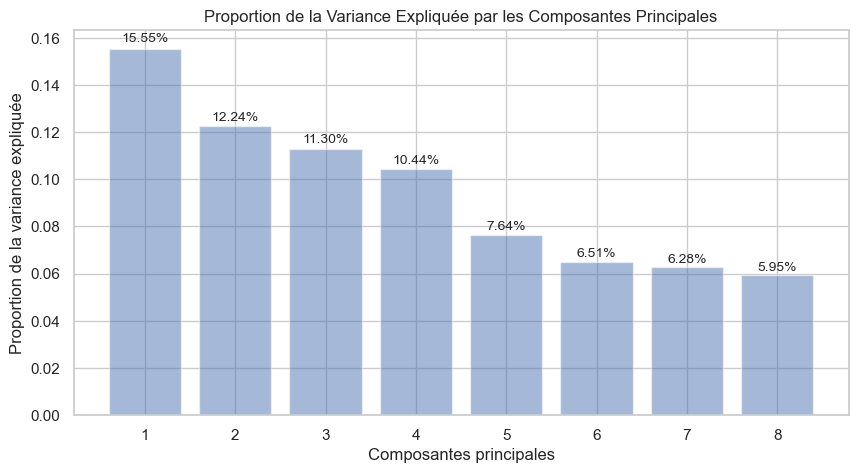

In [108]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')

plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Proportion de la Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
# Ajouter le pourcentage au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height, '{0:.2%}'.format(height), ha='center', va='bottom', fontsize=10)

plt.show()

In [109]:
print(f"Explained Variance: {explained_variance.sum()}")

Explained Variance: 0.7590530518406912


In [110]:
components_df = pd.DataFrame(pca.components_, columns=df_normalized.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
components_df

Recency  Frequency  AvgBasket  TotalFreightPct   nb_item  \
PC1  0.028866   0.231042   0.356873        -0.191179  0.322678   
PC2  0.049567   0.064135   0.093077         0.093407  0.207954   
PC3 -0.028945   0.484784  -0.204908         0.136496  0.336358   
PC4 -0.063700   0.272884  -0.170043         0.115627  0.073067   
PC5 -0.283957   0.192248   0.292434        -0.520468 -0.249719   
PC6 -0.596779   0.000103  -0.162336         0.350716  0.037806   
PC7  0.240127   0.037337  -0.047612         0.088190 -0.123383   
PC8 -0.117125   0.113245  -0.180949         0.288180 -0.157060   

     AverageReviewScore  EngagementIndex  ActualDeliveryTime  \
PC1           -0.065787        -0.141817            0.039261   
PC2           -0.157598        -0.121715            0.227309   
PC3            0.195863        -0.151912           -0.318146   
PC4           -0.382647         0.122400            0.494169   
PC5            0.047281         0.529748           -0.086068   
PC6           -0.038916         0.190455           -0.104559   
PC7           -0.030505         0.169340            0.021040   
PC8           -0.004976         0.436439           -0.050737   

     EstimatedActualDifference  AvgWeight  AvgVolume  DifferentCategories  \
PC1                   0.008976   0.403119   0.401492             0.230754   
PC2                  -0.185539   0.253064   0.262879             0.073368   
PC3                   0.296772  -0.228181  -0.207164             0.465591   
PC4                  -0.498150  -0.237200  -0.235646             0.245859   
PC5                  -0.022650  -0.066730  -0.112731             0.157919   
PC6                  -0.016415   0.229408   0.229670             0.022228   
PC7                   0.090530   0.067841   0.068268             0.025741   
PC8                   0.116688   0.215692   0.205618             0.104433   

     TotalInstallments  boleto_pct  voucher_pct  debit_card_pct  \
PC1           0.388531   -0.227837    -0.058645       -0.063011   
PC2          -0.209062    0.538125     0.098683        0.079803   
PC3           0.015699    0.097062     0.053385        0.031268   
PC4           0.110884   -0.127578    -0.005754       -0.038993   
PC5           0.166024    0.173912     0.026096        0.156861   
PC6          -0.165015   -0.235927     0.058301        0.498843   
PC7           0.105440   -0.222994     0.889704       -0.067456   
PC8          -0.037556    0.182785    -0.154069       -0.679172   

     credit_card_pct  
PC1         0.253913  
PC2        -0.564915  
PC3        -0.120032  
PC4         0.133161  
PC5        -0.218313  
PC6         0.055463  
PC7        -0.102665  
PC8         0.082241

On supprime les features ayant le moins d'impact sur l'explication de la variance ou trop corrélées avec d'autres variables.

In [111]:
# features à supprimer
df_normalized = df_normalized.drop(columns=[ 'debit_card_pct', 'TotalFreightPct', 'AvgVolume' , 'DifferentCategories',
                                            'credit_card_pct'
                                            ])


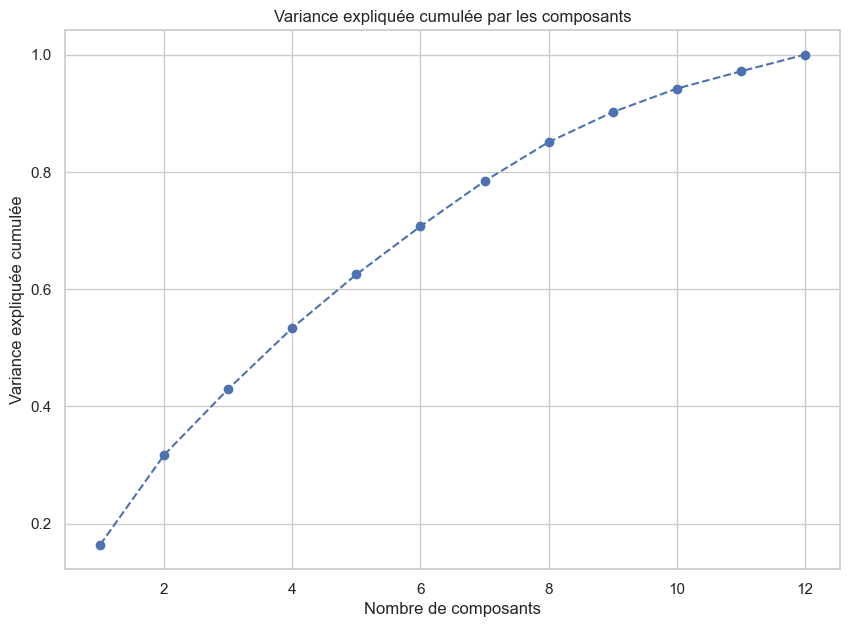

In [112]:
numerics_col = df_normalized.select_dtypes(include=['number'])
numerical_cols = numerics_col.columns.tolist()

# Création de l'ACP
pca = PCA()

# Application de l'ACP sur les données prétraitées
X_pca = pca.fit_transform(df_normalized[numerical_cols])



# Application de l'ACP sur les données prétraitées
X_pca = pca.fit_transform(df_normalized[numerical_cols])

# Combien de composants choisir ? Afficher la variance expliquée cumulée
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par les composants')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [113]:
# Appliquez la PCA
pca = PCA(n_components=8) 
principal_components = pca.fit_transform(df_normalized[numerical_cols])

# Créez un DataFrame avec les composants principaux
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'
                                                               ], index=df_normalized.index)

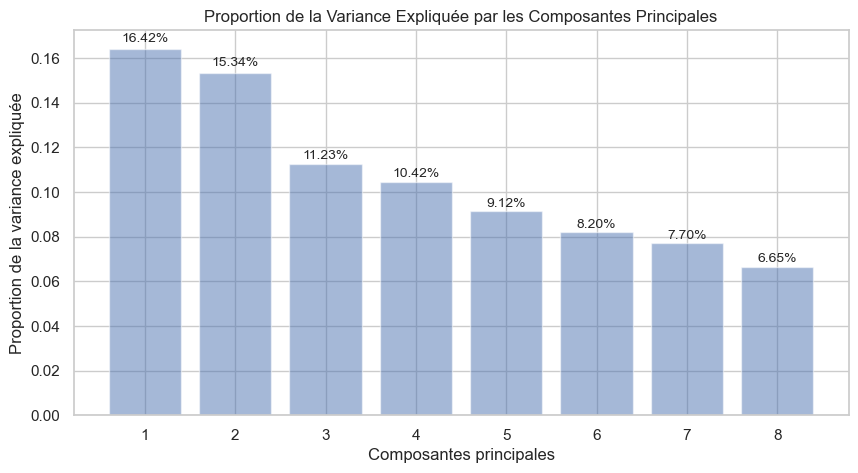

In [114]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')

plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Proportion de la Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
# Ajouter le pourcentage au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height, '{0:.2%}'.format(height), ha='center', va='bottom', fontsize=10)

plt.show()

In [115]:
print(f"Explained Variance: {explained_variance.sum()}")

Explained Variance: 0.8507685094921482


In [116]:
components_df = pd.DataFrame(pca.components_, columns=[numerical_cols], index=[f'PC{i+1}' for i in range(pca.n_components_)])
components_df

Recency Frequency AvgBasket   nb_item AverageReviewScore  \
PC1  0.055655  0.311258  0.413449  0.472286          -0.180754   
PC2 -0.021982 -0.128775 -0.039239 -0.170993          -0.420772   
PC3  0.135098  0.181337 -0.255241  0.435036          -0.034057   
PC4 -0.240201  0.580272 -0.416197  0.186062          -0.076239   
PC5 -0.643009  0.178042  0.171934  0.054891           0.024242   
PC6 -0.532046 -0.138138  0.111644  0.125289          -0.026210   
PC7  0.378173  0.366687  0.120091 -0.064626          -0.089882   
PC8  0.001725  0.177559  0.081773 -0.138255           0.841871   

    EngagementIndex ActualDeliveryTime EstimatedActualDifference AvgWeight  \
PC1       -0.233698           0.188795                 -0.105404  0.399126   
PC2        0.185322           0.601957                 -0.596728 -0.022930   
PC3       -0.479228           0.044478                 -0.065295 -0.109190   
PC4        0.180470          -0.005516                 -0.101368 -0.458013   
PC5        0.323699          -0.129868                 -0.020883  0.133399   
PC6       -0.096992          -0.098191                 -0.069882  0.207826   
PC7        0.523910          -0.004337                  0.213874  0.163104   
PC8       -0.057601           0.258755                 -0.352593  0.012251   

    TotalInstallments boleto_pct voucher_pct  
PC1          0.436666  -0.145601   -0.028433  
PC2         -0.108308   0.100330   -0.001754  
PC3         -0.412751   0.519288   -0.073847  
PC4          0.192333  -0.270468    0.170704  
PC5         -0.069244   0.354132   -0.501593  
PC6         -0.258817  -0.013067    0.731242  
PC7         -0.029402   0.455805    0.374673  
PC8          0.105113   0.130270    0.105635

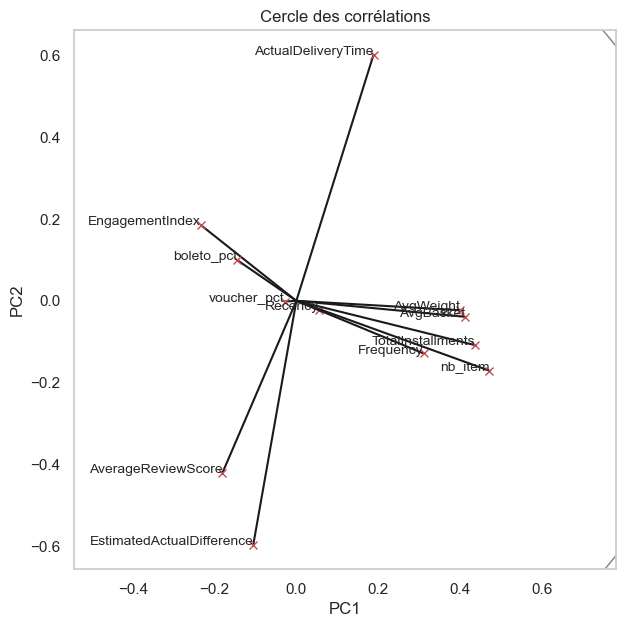

In [117]:
# Récupération des deux premières composantes
pcs = pca.components_[0:2, :]

# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Ajout des lignes
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.plot([0, x], [0, y], 'k-')
    ax.plot(x, y, 'rx')
    ax.annotate(numerical_cols[i], (x, y), fontsize=10, ha='right')

# Limites et labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle des corrélations')

# Affichage du graphique
plt.grid()
plt.axis('equal')
plt.show()


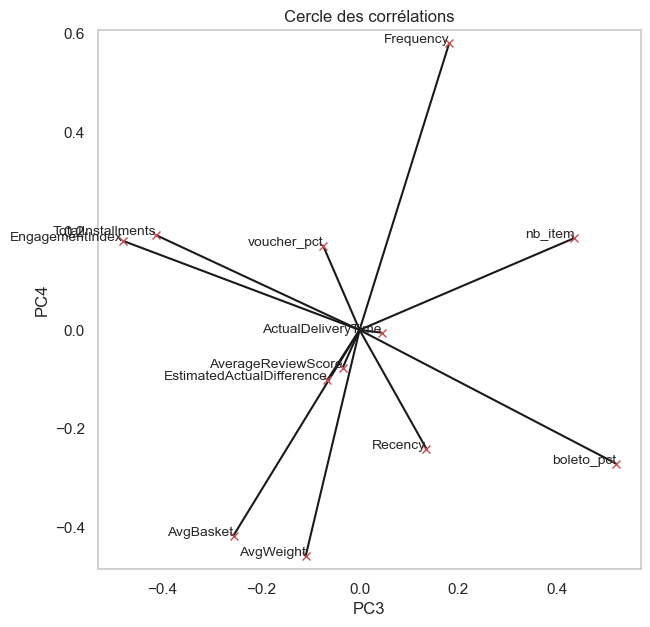

In [118]:
pcs = pca.components_[2:4, :]

# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Ajout des lignes
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.plot([0, x], [0, y], 'k-')
    ax.plot(x, y, 'rx')
    ax.annotate(numerical_cols[i], (x, y), fontsize=10, ha='right')

# Limites et labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
ax.set_title('Cercle des corrélations')

# Affichage du graphique
plt.grid()
plt.axis('equal')
plt.show()

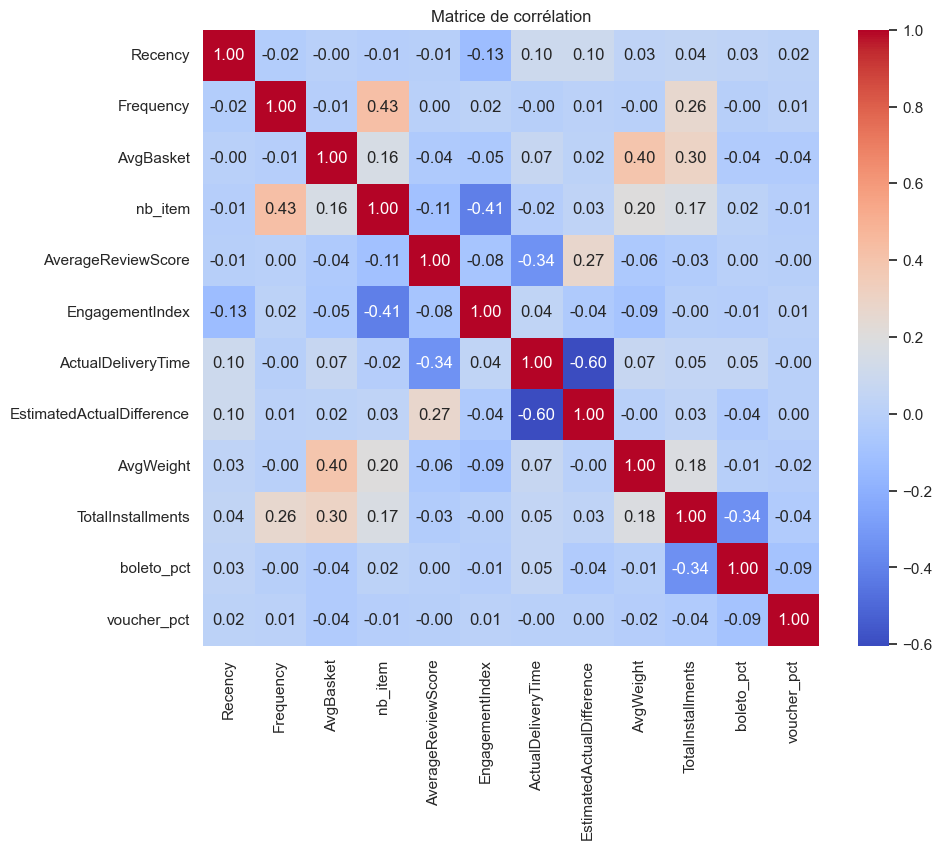

In [119]:
# Calcul de la matrice de corrélation
corr_matrix = df_normalized.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

In [120]:
corr_matrix

Recency  Frequency  AvgBasket   nb_item  \
Recency                    1.000000  -0.021476  -0.000311 -0.012012   
Frequency                 -0.021476   1.000000  -0.009870  0.426335   
AvgBasket                 -0.000311  -0.009870   1.000000  0.160399   
nb_item                   -0.012012   0.426335   0.160399  1.000000   
AverageReviewScore        -0.008592   0.003025  -0.041692 -0.106240   
EngagementIndex           -0.132834   0.021741  -0.052868 -0.410225   
ActualDeliveryTime         0.099256  -0.003832   0.070300 -0.018309   
EstimatedActualDifference  0.100445   0.013322   0.018887  0.032680   
AvgWeight                  0.031897  -0.001887   0.397397  0.203212   
TotalInstallments          0.041711   0.261658   0.302597  0.166824   
boleto_pct                 0.031650  -0.003457  -0.037790  0.017943   
voucher_pct                0.021274   0.012776  -0.035863 -0.011451   

                           AverageReviewScore  EngagementIndex  \
Recency                             -0.008592        -0.132834   
Frequency                            0.003025         0.021741   
AvgBasket                           -0.041692        -0.052868   
nb_item                             -0.106240        -0.410225   
AverageReviewScore                   1.000000        -0.079712   
EngagementIndex                     -0.079712         1.000000   
ActualDeliveryTime                  -0.336163         0.040186   
EstimatedActualDifference            0.269016        -0.040525   
AvgWeight                           -0.056368        -0.089977   
TotalInstallments                   -0.029440        -0.004982   
boleto_pct                           0.000010        -0.011125   
voucher_pct                         -0.004926         0.010274   

                           ActualDeliveryTime  EstimatedActualDifference  \
Recency                              0.099256                   0.100445   
Frequency                           -0.003832                   0.013322   
AvgBasket                            0.070300                   0.018887   
nb_item                             -0.018309                   0.032680   
AverageReviewScore                  -0.336163                   0.269016   
EngagementIndex                      0.040186                  -0.040525   
ActualDeliveryTime                   1.000000                  -0.603902   
EstimatedActualDifference           -0.603902                   1.000000   
AvgWeight                            0.072107                  -0.002360   
TotalInstallments                    0.049728                   0.031565   
boleto_pct                           0.048906                  -0.035559   
voucher_pct                         -0.000345                   0.003070   

                           AvgWeight  TotalInstallments  boleto_pct  \
Recency                     0.031897           0.041711    0.031650   
Frequency                  -0.001887           0.261658   -0.003457   
AvgBasket                   0.397397           0.302597   -0.037790   
nb_item                     0.203212           0.166824    0.017943   
AverageReviewScore         -0.056368          -0.029440    0.000010   
EngagementIndex            -0.089977          -0.004982   -0.011125   
ActualDeliveryTime          0.072107           0.049728    0.048906   
EstimatedActualDifference  -0.002360           0.031565   -0.035559   
AvgWeight                   1.000000           0.181108   -0.007387   
TotalInstallments           0.181108           1.000000   -0.343624   
boleto_pct                 -0.007387          -0.343624    1.000000   
voucher_pct                -0.017840          -0.038821   -0.092466   

                           voucher_pct  
Recency                       0.021274  
Frequency                     0.012776  
AvgBasket                    -0.035863  
nb_item                      -0.011451  
AverageReviewScore           -0.004926  
EngagementIndex               0.010274  
ActualDeliveryTime           -0.000345  
Esti

In [121]:
# Concaténation avec OHE
df_normalized = df_normalized.set_index(df_processed.index)
final_df = pd.concat([df_normalized, df_processed[categorical_features]], axis=1)

final_df.head()

Recency  Frequency  AvgBasket   nb_item  AverageReviewScore  \
0 -0.823824  -0.166833  -0.083401 -0.291761            0.661413   
1 -0.804152  -0.166833  -0.609331 -0.291761           -0.120032   
2  1.963167  -0.166833  -0.338687 -0.291761           -0.901478   
3  0.546720  -0.166833  -0.534002 -0.291761           -0.120032   
4  0.330318  -0.166833   0.168721 -0.291761            0.661413   

   EngagementIndex  ActualDeliveryTime  EstimatedActualDifference  AvgWeight  \
0         2.095657           -0.646417                  -0.700191  -0.186601   
1        -0.504750           -0.976784                  -0.688748  -0.423669   
2        -0.504750            1.395680                  -0.972637  -0.186601   
3         0.795453            0.793777                  -0.007344  -0.471082   
4        -0.504750            0.064905                  -0.411915   0.772205   

   TotalInstallments  boleto_pct  voucher_pct  Region_CentreOuest  \
0           1.669969    -0.50049     -0.18714                 0.0   
1          -0.701200    -0.50049     -0.18714                 0.0   
2           1.669969    -0.50049     -0.18714                 0.0   
3           0.315015    -0.50049     -0.18714                 0.0   
4           0.992492    -0.50049     -0.18714                 0.0   

   Region_Nord  Region_NordEst  Region_Sud  Region_SudEst  
0          0.0             0.0         0.0            1.0  
1          0.0             0.0         0.0            1.0  
2          0.0             0.0         1.0            0.0  
3          1.0             0.0         0.0            0.0  
4          0.0             0.0         0.0            1.0

In [122]:
final_df.describe()

Recency     Frequency     AvgBasket       nb_item  \
count  9.241100e+04  9.241100e+04  9.241100e+04  9.241100e+04   
mean   7.842720e-18 -2.794161e-16 -2.706507e-17  8.084922e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.551721e+00 -1.668332e-01 -6.900248e-01 -2.917611e-01   
25%   -8.107091e-01 -1.668332e-01 -4.480356e-01 -2.917611e-01   
50%   -1.221582e-01 -1.668332e-01 -2.495567e-01 -2.917611e-01   
75%    7.106604e-01 -1.668332e-01  7.465062e-02 -2.917611e-01   
max    2.999272e+00  3.848493e+01  6.191398e+01  3.713052e+01   

       AverageReviewScore  EngagementIndex  ActualDeliveryTime  \
count        9.241100e+04     9.241100e+04        9.241100e+04   
mean        -4.963211e-17     8.246389e-17       -8.131055e-17   
std          1.000005e+00     1.000005e+00        1.000005e+00   
min         -2.464370e+00    -2.975137e+00       -1.267677e+00   
25%         -1.200325e-01    -5.047505e-01       -6.076500e-01   
50%          6.614135e-01    -5.047505e-01       -2.437057e-01   
75%          6.614135e-01     7.954532e-01        3.315297e-01   
max          6.614135e-01     1.249729e+01        2.069783e+01   

       EstimatedActualDifference     AvgWeight  TotalInstallments  \
count               9.241100e+04  9.241100e+04       9.241100e+04   
mean                1.468588e-17  4.828655e-17      -6.074263e-18   
std                 1.000005e+00  1.000005e+00       1.000005e+00   
min                -1.987925e+01 -5.026911e-01      -1.039939e+00   
25%                -4.739649e-01 -4.394731e-01      -7.012004e-01   
50%                 6.909324e-02 -3.446461e-01      -3.624619e-01   
75%                 5.012625e-01 -6.016502e-02       3.150149e-01   
max                 1.339134e+01  3.835531e+01       2.063932e+01   

         boleto_pct   voucher_pct  Region_CentreOuest   Region_Nord  \
count  9.241100e+04  9.241100e+04        92411.000000  92411.000000   
mean  -2.629618e-17  4.305807e-18            0.058402      0.018634   
std    1.000005e+00  1.000005e+00            0.234504      0.135230   
min   -5.004897e-01 -1.871402e-01            0.000000      0.000000   
25%   -5.004897e-01 -1.871402e-01            0.000000      0.000000   
50%   -5.004897e-01 -1.871402e-01            0.000000      0.000000   
75%   -5.004897e-01 -1.871402e-01            0.000000      0.000000   
max    2.005441e+00  6.125951e+00            1.000000      1.000000   

       Region_NordEst    Region_Sud  Region_SudEst  
count    92411.000000  92411.000000   92411.000000  
mean         0.094210      0.143446       0.685308  
std          0.292122      0.350529       0.464396  
min          0.000000      0.000000       0.000000  
25%          0.000000      0.000000       0.000000  
50%          0.000000      0.000000       1.000000  
75%          0.000000      0.000000       1.000000  
max          1.000000      1.000000       1.000000

In [123]:
final_df.shape

(92411, 17)

# Export des données

In [124]:
final_df.columns.tolist()

['Recency',
 'Frequency',
 'AvgBasket',
 'nb_item',
 'AverageReviewScore',
 'EngagementIndex',
 'ActualDeliveryTime',
 'EstimatedActualDifference',
 'AvgWeight',
 'TotalInstallments',
 'boleto_pct',
 'voucher_pct',
 'Region_CentreOuest',
 'Region_Nord',
 'Region_NordEst',
 'Region_Sud',
 'Region_SudEst']

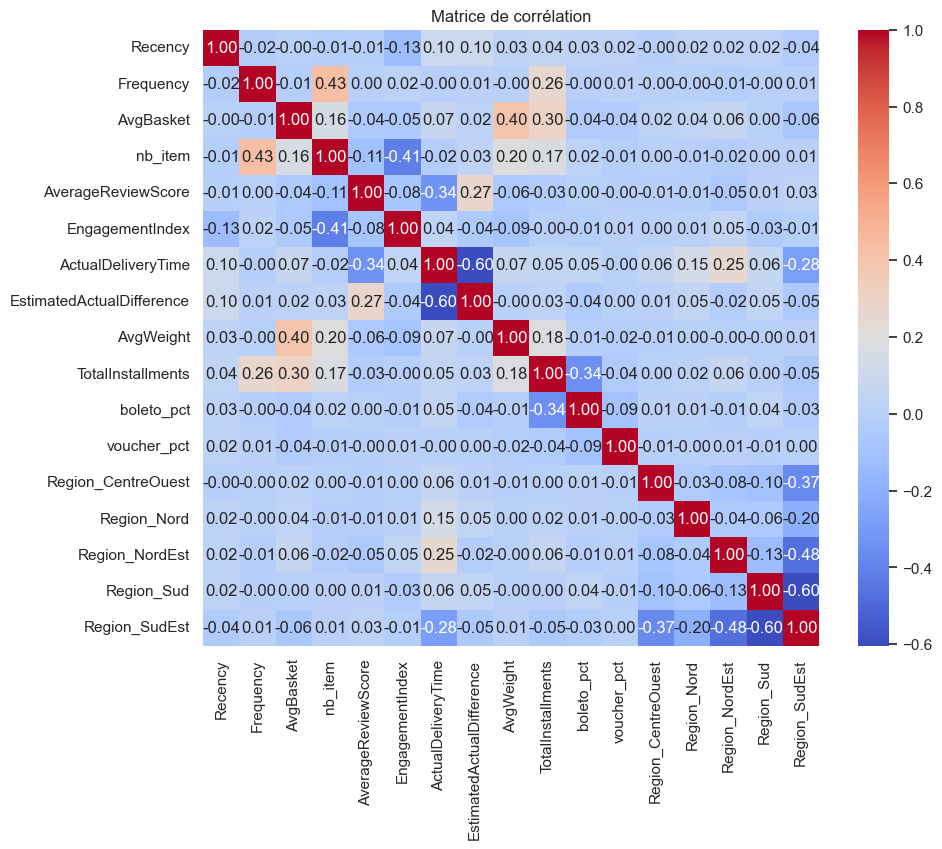

In [125]:
# Calcul de la matrice de corrélation
corr_matrix = final_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

In [126]:
path = "data/cleaned/"
filename = "data.csv"

In [127]:
final_df.to_csv(path+filename, index=False)

## Version ACP

In [128]:
principal_df.columns.tolist()

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

In [129]:
principal_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.194662  0.005052 -2.172031  0.993896  1.038737 -0.294003  0.149874   
1 -0.855659 -0.071288  0.226817  0.451531  0.250197  0.505583 -1.163056   
2  1.159363  1.521345 -0.322320  0.096919 -1.936366 -1.693608 -0.115845   
3 -0.365914  0.687229 -0.613014  0.468676 -0.505458 -0.825181  0.138488   
4  0.772283 -0.204570 -0.646519 -0.460149 -0.425371 -0.343077 -0.510887   

        PC8  
0  0.606488  
1 -0.286240  
2  0.048918  
3 -0.028523  
4  0.801830

In [130]:
principal_df.shape

(92411, 8)

In [131]:
path = "data/cleaned/"
filename = "data_ACP.csv"

In [132]:
principal_df.to_csv(path+filename, index=False)

## Version non transformée des données

In [133]:
df.shape

(92411, 29)

In [134]:
filename = "data_clean_non_normal.csv"
df.to_csv(path+filename, index=False)